[Kaggle Link](https://www.kaggle.com/c/santander-customer-satisfaction)

# 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print(f"data shape: {cust_df.shape}")
cust_df.head()

data shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
# 데이터 타입 확인
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [4]:
# 불만족 건수 비율 확인
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print(f"불만족 건수 비율: {(unsatisfied_cnt / total_cnt):.2f}")

불만족 건수 비율: 0.04


In [5]:
# 피쳐 분포도 확인
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


-999999 는 타 값들과 너무 큰 차이가 남 <br/>
가장많은 2로 대체

In [7]:
# var3 피쳐 값 대체 및 ID 피쳐 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

In [8]:
# 피쳐 세트와 레이블 세트 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:,-1]
print(f"피쳐 데이터 shape: {X_features.shape}")

피쳐 데이터 shape: (76020, 369)


# 학습/테스트 데이터 분할

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.3, random_state=216, 
                                                    stratify = y_labels) # stratify로 학습 및 테스트 세트 레이블 값 비율을 맞춰줌
train_cnt = y_train.count()
test_cnt = y_test.count()
print(f"학습 세트 shape:{X_train.shape}, 테스트 세트 shape:{X_test.shape}\n")

print(f"학습 세트 레이블 값 분포 비율:\n{y_train.value_counts()/train_cnt}\n")
print(f"테스트 세트 레이블 값 분포 비율:\n{y_test.value_counts()/test_cnt}")

학습 세트 shape:(53214, 369), 테스트 세트 shape:(22806, 369)

학습 세트 레이블 값 분포 비율:
0    0.960424
1    0.039576
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율:
0    0.960449
1    0.039551
Name: TARGET, dtype: float64


# XGBoost 모델 학습 수행

evaluation은 학습이 제대로 되고 있는지 방향성을 알려준다.<br/> 
즉 학습데이터와 검증데이터로 나누고 학습을 수행하면서 평가를 검증데이터로 계속 진행한다.<br/>
보통은 evaluation 데이터를 학습 데이터의 일부를 쪼개서 별도로 구성한다.<br/>
테스트 데이터는 아예 학습/검증 데이터가 아닌 다른 데이터를 사용한다.

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=216)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(f"ROC AUC: {xgb_roc_score:.4f}")

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82185	validation_1-auc:0.81866
[1]	validation_0-auc:0.83628	validation_1-auc:0.82660
[2]	validation_0-auc:0.84094	validation_1-auc:0.82733
[3]	validation_0-auc:0.84549	validation_1-auc:0.83254
[4]	validation_0-auc:0.84730	validation_1-auc:0.83298
[5]	validation_0-auc:0.84935	validation_1-auc:0.83518
[6]	validation_0-auc:0.85606	validation_1-auc:0.83629
[7]	validation_0-auc:0.85838	validation_1-auc:0.83588
[8]	validation_0-auc:0.86216	validation_1-auc:0.83674
[9]	validation_0-auc:0.86489	validation_1-auc:0.83767
[10]	validation_0-auc:0.86792	validation_1-auc:0.83900
[11]	validation_0-auc:0.87038	validation_1-auc:0.84062
[12]	validation_0-auc:0.87309	validation_1-auc:0.84081
[13]	validation_0-auc:0.87673	validation_1-auc:0.84048
[14]	validation_0-auc:0.87892	validation_1-auc:0.84115
[15]	validation_0-auc:0.88165	validation_1-auc:0.84062
[16]	validation_0-auc:0.88311	validation_1-auc:0.84080
[17]	validation_0-auc:0.88446	validation_1-auc:0.84079
[18]	validation_0-au

## 하이퍼 파라미터 튜닝

In [11]:
from sklearn.model_selection import GridSearchCV

# 개인 PC 역량 한계로 인해 n_estimator=100으로 설정
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# 하이퍼 파라미터 테스트 수행속도를 위해 cv지정하지않음
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
          eval_set=[(X_train, y_train), (X_test, y_test)])

print(f"최적 파라미터:{gridcv.best_params_}")

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f"ROC AUC: {xgb_roc_score:.4f}")

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80182	validation_1-auc:0.80032
[1]	validation_0-auc:0.82339	validation_1-auc:0.82233
[2]	validation_0-auc:0.82855	validation_1-auc:0.82525
[3]	validation_0-auc:0.83432	validation_1-auc:0.82843
[4]	validation_0-auc:0.83625	validation_1-auc:0.82815
[5]	validation_0-auc:0.83964	validation_1-auc:0.82876
[6]	validation_0-auc:0.83617	validation_1-auc:0.82430
[7]	validation_0-auc:0.84385	validation_1-auc:0.82899
[8]	validation_0-auc:0.84849	validation_1-auc:0.83344
[9]	validation_0-auc:0.84876	validation_1-auc:0.82944
[10]	validation_0-auc:0.84983	validation_1-auc:0.82610
[11]	validation_0-auc:0.84975	validation_1-auc:0.82546
[12]	validation_0-auc:0.85517	validation_1-auc:0.83373
[13]	validation_0-auc:0.85984	validation_1-auc:0.84042
[14]	validation_0-auc:0.86117	validation_1-auc:0.84133
[15]	validation_0-auc:0.86310	validation_1-auc:0.84110
[16]	validation_0-auc:0.86455	validation_1-auc:0.84213
[17]	validation_0-auc:0.86626	validation_1-auc:0.84308
[18]	validation_0-au

[40]	validation_0-auc:0.88219	validation_1-auc:0.83974
[41]	validation_0-auc:0.88249	validation_1-auc:0.83975
[42]	validation_0-auc:0.88350	validation_1-auc:0.83947
[43]	validation_0-auc:0.88362	validation_1-auc:0.83939
[44]	validation_0-auc:0.88368	validation_1-auc:0.83914
[45]	validation_0-auc:0.88386	validation_1-auc:0.83942
[46]	validation_0-auc:0.88417	validation_1-auc:0.83971
[47]	validation_0-auc:0.88449	validation_1-auc:0.83954
[48]	validation_0-auc:0.88481	validation_1-auc:0.83939
[49]	validation_0-auc:0.88551	validation_1-auc:0.83907
[50]	validation_0-auc:0.88663	validation_1-auc:0.83824
[51]	validation_0-auc:0.88671	validation_1-auc:0.83803
[52]	validation_0-auc:0.88712	validation_1-auc:0.83818
[53]	validation_0-auc:0.88749	validation_1-auc:0.83773
[54]	validation_0-auc:0.88788	validation_1-auc:0.83731
[0]	validation_0-auc:0.79808	validation_1-auc:0.79943
[1]	validation_0-auc:0.82205	validation_1-auc:0.82216
[2]	validation_0-auc:0.82746	validation_1-auc:0.82759
[3]	validatio

[39]	validation_0-auc:0.87804	validation_1-auc:0.84105
[40]	validation_0-auc:0.87833	validation_1-auc:0.84064
[41]	validation_0-auc:0.87851	validation_1-auc:0.84049
[42]	validation_0-auc:0.87881	validation_1-auc:0.84050
[43]	validation_0-auc:0.87892	validation_1-auc:0.84049
[44]	validation_0-auc:0.88043	validation_1-auc:0.84080
[45]	validation_0-auc:0.88058	validation_1-auc:0.84031
[46]	validation_0-auc:0.88079	validation_1-auc:0.84032
[47]	validation_0-auc:0.88096	validation_1-auc:0.84048
[48]	validation_0-auc:0.88111	validation_1-auc:0.84019
[49]	validation_0-auc:0.88153	validation_1-auc:0.83998
[50]	validation_0-auc:0.88265	validation_1-auc:0.83923
[51]	validation_0-auc:0.88349	validation_1-auc:0.83918
[52]	validation_0-auc:0.88358	validation_1-auc:0.83907
[53]	validation_0-auc:0.88391	validation_1-auc:0.83849
[0]	validation_0-auc:0.80110	validation_1-auc:0.79755
[1]	validation_0-auc:0.82233	validation_1-auc:0.81761
[2]	validation_0-auc:0.82844	validation_1-auc:0.82526
[3]	validatio

[22]	validation_0-auc:0.86560	validation_1-auc:0.84162
[23]	validation_0-auc:0.86602	validation_1-auc:0.84177
[24]	validation_0-auc:0.86621	validation_1-auc:0.84204
[25]	validation_0-auc:0.86690	validation_1-auc:0.84214
[26]	validation_0-auc:0.86820	validation_1-auc:0.84166
[27]	validation_0-auc:0.86885	validation_1-auc:0.84180
[28]	validation_0-auc:0.86929	validation_1-auc:0.84193
[29]	validation_0-auc:0.86943	validation_1-auc:0.84185
[30]	validation_0-auc:0.86969	validation_1-auc:0.84152
[31]	validation_0-auc:0.87023	validation_1-auc:0.84147
[32]	validation_0-auc:0.87082	validation_1-auc:0.84135
[33]	validation_0-auc:0.87178	validation_1-auc:0.84149
[34]	validation_0-auc:0.87198	validation_1-auc:0.84150
[35]	validation_0-auc:0.87266	validation_1-auc:0.84148
[36]	validation_0-auc:0.87315	validation_1-auc:0.84115
[37]	validation_0-auc:0.87329	validation_1-auc:0.84142
[38]	validation_0-auc:0.87339	validation_1-auc:0.84152
[39]	validation_0-auc:0.87390	validation_1-auc:0.84130
[40]	valid

[21]	validation_0-auc:0.89520	validation_1-auc:0.83488
[22]	validation_0-auc:0.89599	validation_1-auc:0.83610
[23]	validation_0-auc:0.89677	validation_1-auc:0.83555
[24]	validation_0-auc:0.89793	validation_1-auc:0.83573
[25]	validation_0-auc:0.89862	validation_1-auc:0.83580
[26]	validation_0-auc:0.89917	validation_1-auc:0.83594
[27]	validation_0-auc:0.89945	validation_1-auc:0.83644
[28]	validation_0-auc:0.89959	validation_1-auc:0.83672
[29]	validation_0-auc:0.90098	validation_1-auc:0.83635
[30]	validation_0-auc:0.90205	validation_1-auc:0.83638
[31]	validation_0-auc:0.90243	validation_1-auc:0.83665
[32]	validation_0-auc:0.90285	validation_1-auc:0.83689
[33]	validation_0-auc:0.90289	validation_1-auc:0.83658
[34]	validation_0-auc:0.90367	validation_1-auc:0.83670
[35]	validation_0-auc:0.90450	validation_1-auc:0.83558
[36]	validation_0-auc:0.90588	validation_1-auc:0.83509
[37]	validation_0-auc:0.90612	validation_1-auc:0.83498
[38]	validation_0-auc:0.90777	validation_1-auc:0.83488
[39]	valid

[8]	validation_0-auc:0.86788	validation_1-auc:0.83681
[9]	validation_0-auc:0.86940	validation_1-auc:0.83094
[10]	validation_0-auc:0.87096	validation_1-auc:0.82831
[11]	validation_0-auc:0.87233	validation_1-auc:0.82816
[12]	validation_0-auc:0.87822	validation_1-auc:0.83206
[13]	validation_0-auc:0.88255	validation_1-auc:0.83520
[14]	validation_0-auc:0.88476	validation_1-auc:0.83576
[15]	validation_0-auc:0.88615	validation_1-auc:0.83603
[16]	validation_0-auc:0.88820	validation_1-auc:0.83646
[17]	validation_0-auc:0.89095	validation_1-auc:0.83817
[18]	validation_0-auc:0.89230	validation_1-auc:0.83795
[19]	validation_0-auc:0.89435	validation_1-auc:0.83894
[20]	validation_0-auc:0.89531	validation_1-auc:0.83807
[21]	validation_0-auc:0.89652	validation_1-auc:0.83756
[22]	validation_0-auc:0.89736	validation_1-auc:0.83785
[23]	validation_0-auc:0.89886	validation_1-auc:0.83830
[24]	validation_0-auc:0.89953	validation_1-auc:0.83815
[25]	validation_0-auc:0.90043	validation_1-auc:0.83738
[26]	validat

[45]	validation_0-auc:0.90153	validation_1-auc:0.83829
[46]	validation_0-auc:0.90160	validation_1-auc:0.83843
[0]	validation_0-auc:0.81196	validation_1-auc:0.80389
[1]	validation_0-auc:0.83449	validation_1-auc:0.82395
[2]	validation_0-auc:0.84098	validation_1-auc:0.83197
[3]	validation_0-auc:0.84410	validation_1-auc:0.83516
[4]	validation_0-auc:0.84959	validation_1-auc:0.83355
[5]	validation_0-auc:0.85290	validation_1-auc:0.83303
[6]	validation_0-auc:0.85150	validation_1-auc:0.82866
[7]	validation_0-auc:0.85920	validation_1-auc:0.83418
[8]	validation_0-auc:0.86522	validation_1-auc:0.83813
[9]	validation_0-auc:0.86679	validation_1-auc:0.83199
[10]	validation_0-auc:0.86729	validation_1-auc:0.82663
[11]	validation_0-auc:0.86718	validation_1-auc:0.82642
[12]	validation_0-auc:0.87238	validation_1-auc:0.83234
[13]	validation_0-auc:0.87732	validation_1-auc:0.83696
[14]	validation_0-auc:0.87884	validation_1-auc:0.83808
[15]	validation_0-auc:0.88003	validation_1-auc:0.83675
[16]	validation_0-au

[42]	validation_0-auc:0.90127	validation_1-auc:0.83722
[43]	validation_0-auc:0.90151	validation_1-auc:0.83664
[44]	validation_0-auc:0.90233	validation_1-auc:0.83674
[45]	validation_0-auc:0.90267	validation_1-auc:0.83705
[46]	validation_0-auc:0.90325	validation_1-auc:0.83656
[47]	validation_0-auc:0.90384	validation_1-auc:0.83638
[48]	validation_0-auc:0.90396	validation_1-auc:0.83636
[49]	validation_0-auc:0.90433	validation_1-auc:0.83617
[50]	validation_0-auc:0.90536	validation_1-auc:0.83584
[51]	validation_0-auc:0.90539	validation_1-auc:0.83575
[52]	validation_0-auc:0.90603	validation_1-auc:0.83528
[53]	validation_0-auc:0.90610	validation_1-auc:0.83556
[54]	validation_0-auc:0.90661	validation_1-auc:0.83563
[55]	validation_0-auc:0.90716	validation_1-auc:0.83594
[0]	validation_0-auc:0.81639	validation_1-auc:0.81867
[1]	validation_0-auc:0.82600	validation_1-auc:0.82368
[2]	validation_0-auc:0.83176	validation_1-auc:0.82570
[3]	validation_0-auc:0.83283	validation_1-auc:0.82717
[4]	validation

[15]	validation_0-auc:0.86460	validation_1-auc:0.84203
[16]	validation_0-auc:0.86574	validation_1-auc:0.84239
[17]	validation_0-auc:0.86742	validation_1-auc:0.84312
[18]	validation_0-auc:0.86879	validation_1-auc:0.84323
[19]	validation_0-auc:0.86963	validation_1-auc:0.84299
[20]	validation_0-auc:0.87131	validation_1-auc:0.84274
[21]	validation_0-auc:0.87243	validation_1-auc:0.84266
[22]	validation_0-auc:0.87297	validation_1-auc:0.84236
[23]	validation_0-auc:0.87355	validation_1-auc:0.84216
[24]	validation_0-auc:0.87513	validation_1-auc:0.84233
[25]	validation_0-auc:0.87533	validation_1-auc:0.84237
[26]	validation_0-auc:0.87627	validation_1-auc:0.84218
[27]	validation_0-auc:0.87704	validation_1-auc:0.84202
[28]	validation_0-auc:0.87764	validation_1-auc:0.84214
[29]	validation_0-auc:0.87776	validation_1-auc:0.84235
[30]	validation_0-auc:0.87824	validation_1-auc:0.84224
[31]	validation_0-auc:0.87899	validation_1-auc:0.84279
[32]	validation_0-auc:0.87952	validation_1-auc:0.84331
[33]	valid

[4]	validation_0-auc:0.83856	validation_1-auc:0.83197
[5]	validation_0-auc:0.84160	validation_1-auc:0.83326
[6]	validation_0-auc:0.84660	validation_1-auc:0.83480
[7]	validation_0-auc:0.84841	validation_1-auc:0.83646
[8]	validation_0-auc:0.85036	validation_1-auc:0.83867
[9]	validation_0-auc:0.85328	validation_1-auc:0.84017
[10]	validation_0-auc:0.85403	validation_1-auc:0.83783
[11]	validation_0-auc:0.85379	validation_1-auc:0.83606
[12]	validation_0-auc:0.85750	validation_1-auc:0.84036
[13]	validation_0-auc:0.85977	validation_1-auc:0.84208
[14]	validation_0-auc:0.86098	validation_1-auc:0.84354
[15]	validation_0-auc:0.86208	validation_1-auc:0.84418
[16]	validation_0-auc:0.86349	validation_1-auc:0.84410
[17]	validation_0-auc:0.86478	validation_1-auc:0.84420
[18]	validation_0-auc:0.86537	validation_1-auc:0.84410
[19]	validation_0-auc:0.86649	validation_1-auc:0.84373
[20]	validation_0-auc:0.86784	validation_1-auc:0.84383
[21]	validation_0-auc:0.86911	validation_1-auc:0.84440
[22]	validation_

[40]	validation_0-auc:0.87924	validation_1-auc:0.84070
[41]	validation_0-auc:0.88006	validation_1-auc:0.84027
[42]	validation_0-auc:0.88061	validation_1-auc:0.84024
[43]	validation_0-auc:0.88124	validation_1-auc:0.83981
[44]	validation_0-auc:0.88141	validation_1-auc:0.83974
[45]	validation_0-auc:0.88217	validation_1-auc:0.83908
[46]	validation_0-auc:0.88315	validation_1-auc:0.83886
[47]	validation_0-auc:0.88322	validation_1-auc:0.83896
[48]	validation_0-auc:0.88342	validation_1-auc:0.83876
[49]	validation_0-auc:0.88357	validation_1-auc:0.83848
[0]	validation_0-auc:0.81166	validation_1-auc:0.81279
[1]	validation_0-auc:0.82537	validation_1-auc:0.82495
[2]	validation_0-auc:0.82956	validation_1-auc:0.82586
[3]	validation_0-auc:0.83378	validation_1-auc:0.83003
[4]	validation_0-auc:0.83557	validation_1-auc:0.83127
[5]	validation_0-auc:0.83902	validation_1-auc:0.83366
[6]	validation_0-auc:0.84232	validation_1-auc:0.83425
[7]	validation_0-auc:0.84536	validation_1-auc:0.83571
[8]	validation_0-a

[37]	validation_0-auc:0.90796	validation_1-auc:0.84064
[38]	validation_0-auc:0.90813	validation_1-auc:0.84077
[39]	validation_0-auc:0.90827	validation_1-auc:0.84044
[40]	validation_0-auc:0.90835	validation_1-auc:0.84036
[41]	validation_0-auc:0.90851	validation_1-auc:0.84038
[42]	validation_0-auc:0.90883	validation_1-auc:0.83997
[43]	validation_0-auc:0.90934	validation_1-auc:0.83982
[44]	validation_0-auc:0.90983	validation_1-auc:0.83977
[45]	validation_0-auc:0.90995	validation_1-auc:0.83990
[46]	validation_0-auc:0.91030	validation_1-auc:0.83965
[0]	validation_0-auc:0.82000	validation_1-auc:0.81792
[1]	validation_0-auc:0.83289	validation_1-auc:0.82380
[2]	validation_0-auc:0.83840	validation_1-auc:0.82557
[3]	validation_0-auc:0.84390	validation_1-auc:0.83120
[4]	validation_0-auc:0.84939	validation_1-auc:0.83007
[5]	validation_0-auc:0.85241	validation_1-auc:0.83207
[6]	validation_0-auc:0.85421	validation_1-auc:0.83243
[7]	validation_0-auc:0.86067	validation_1-auc:0.83656
[8]	validation_0-a

[2]	validation_0-auc:0.84192	validation_1-auc:0.82576
[3]	validation_0-auc:0.84676	validation_1-auc:0.82895
[4]	validation_0-auc:0.85015	validation_1-auc:0.83000
[5]	validation_0-auc:0.85369	validation_1-auc:0.83270
[6]	validation_0-auc:0.85996	validation_1-auc:0.83318
[7]	validation_0-auc:0.86379	validation_1-auc:0.83567
[8]	validation_0-auc:0.86981	validation_1-auc:0.83700
[9]	validation_0-auc:0.87340	validation_1-auc:0.83577
[10]	validation_0-auc:0.87628	validation_1-auc:0.83456
[11]	validation_0-auc:0.87712	validation_1-auc:0.83265
[12]	validation_0-auc:0.88237	validation_1-auc:0.83688
[13]	validation_0-auc:0.88565	validation_1-auc:0.83887
[14]	validation_0-auc:0.88957	validation_1-auc:0.84055
[15]	validation_0-auc:0.89191	validation_1-auc:0.84062
[16]	validation_0-auc:0.89297	validation_1-auc:0.83993
[17]	validation_0-auc:0.89397	validation_1-auc:0.84073
[18]	validation_0-auc:0.89582	validation_1-auc:0.83968
[19]	validation_0-auc:0.89733	validation_1-auc:0.83915
[20]	validation_0-

[49]	validation_0-auc:0.90599	validation_1-auc:0.83524
[50]	validation_0-auc:0.90619	validation_1-auc:0.83522
[51]	validation_0-auc:0.90703	validation_1-auc:0.83490
[52]	validation_0-auc:0.90738	validation_1-auc:0.83502
[53]	validation_0-auc:0.90756	validation_1-auc:0.83482
[54]	validation_0-auc:0.90768	validation_1-auc:0.83486
[55]	validation_0-auc:0.90779	validation_1-auc:0.83473
[56]	validation_0-auc:0.90790	validation_1-auc:0.83463
[57]	validation_0-auc:0.90805	validation_1-auc:0.83461
[0]	validation_0-auc:0.81575	validation_1-auc:0.81468
[1]	validation_0-auc:0.83430	validation_1-auc:0.82652
[2]	validation_0-auc:0.84317	validation_1-auc:0.83218
[3]	validation_0-auc:0.84563	validation_1-auc:0.83444
[4]	validation_0-auc:0.85032	validation_1-auc:0.83449
[5]	validation_0-auc:0.85167	validation_1-auc:0.83365
[6]	validation_0-auc:0.85489	validation_1-auc:0.83552
[7]	validation_0-auc:0.86013	validation_1-auc:0.83723
[8]	validation_0-auc:0.86522	validation_1-auc:0.84001
[9]	validation_0-au

[2]	validation_0-auc:0.83541	validation_1-auc:0.82873
[3]	validation_0-auc:0.83712	validation_1-auc:0.83089
[4]	validation_0-auc:0.83977	validation_1-auc:0.83006
[5]	validation_0-auc:0.84161	validation_1-auc:0.83176
[6]	validation_0-auc:0.84796	validation_1-auc:0.83416
[7]	validation_0-auc:0.84981	validation_1-auc:0.83561
[8]	validation_0-auc:0.85166	validation_1-auc:0.83628
[9]	validation_0-auc:0.85502	validation_1-auc:0.83792
[10]	validation_0-auc:0.85583	validation_1-auc:0.83811
[11]	validation_0-auc:0.85508	validation_1-auc:0.83613
[12]	validation_0-auc:0.85918	validation_1-auc:0.84068
[13]	validation_0-auc:0.86161	validation_1-auc:0.84199
[14]	validation_0-auc:0.86287	validation_1-auc:0.84370
[15]	validation_0-auc:0.86372	validation_1-auc:0.84342
[16]	validation_0-auc:0.86520	validation_1-auc:0.84408
[17]	validation_0-auc:0.86601	validation_1-auc:0.84506
[18]	validation_0-auc:0.86649	validation_1-auc:0.84460
[19]	validation_0-auc:0.86719	validation_1-auc:0.84462
[20]	validation_0-

좋은 알고리즘으로는 하이퍼파라미터 엔지니어링으로 예측성능에 큰 영향을 미치지 못함<br/>
피쳐 엔지니어링이 훨씬 도움됨

In [15]:
xgb_clf = XGBClassifier(n_estimator=100, random_state=216, colsample_bytree=0.75,
                        max_depth=5, min_child_weight=3)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc",
            eval_set=[(X_train, y_train), (X_test, y_test)])

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:33] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80066	validation_1-auc:0.79810
[1]	validation_0-auc:0.80639	validation_1-auc:0.80024
[2]	validation_0-auc:0.83024	validation_1-auc:0.82368
[3]	validation_0-auc:0.83945	validation_1-auc:0.83006
[4]	validation_0-auc:0.83762	validation_1-auc:0.82560
[5]	validation_0-auc:0.84295	validation_1-auc:0.83015
[6]	validation_0-auc:0.84509	validation_1-auc:0.83262
[7]	validation_0-auc:0.84912	validation_1-auc:0.83483
[8]	validation_0-auc:0.85101	validation_1-auc:0.83701
[9]	validation_0-auc:0.85244	validation_1-auc:0.83779
[10]	validation_0-auc:0.85406	validation_1-auc:0.83668
[11]	validation_0-auc:0.85521	validation_1-auc:0.83618
[12]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimator=100, n_estimators=100, n_jobs=12, num_parallel_tree=1,
              random_state=216, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

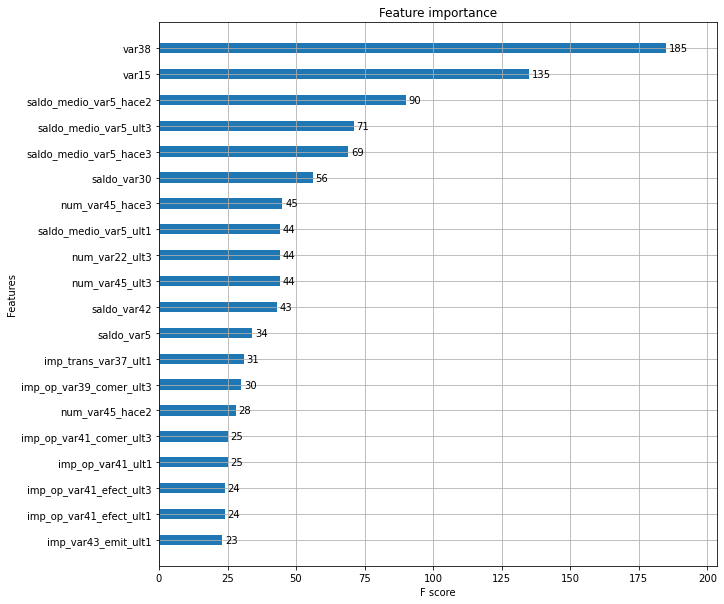

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(10,10))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

# LightGBM 모델 학습

In [19]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f"ROC AUC: {lgbm_roc_score:.4f}")

[1]	valid_0's auc: 0.819645	valid_0's binary_logloss: 0.15865
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.8207	valid_0's binary_logloss: 0.153765
[3]	valid_0's auc: 0.825	valid_0's binary_logloss: 0.150353
[4]	valid_0's auc: 0.830254	valid_0's binary_logloss: 0.147636
[5]	valid_0's auc: 0.829788	valid_0's binary_logloss: 0.145639
[6]	valid_0's auc: 0.830257	valid_0's binary_logloss: 0.143931
[7]	valid_0's auc: 0.831207	valid_0's binary_logloss: 0.142572
[8]	valid_0's auc: 0.83163	valid_0's binary_logloss: 0.141435
[9]	valid_0's auc: 0.832528	valid_0's binary_logloss: 0.140438
[10]	valid_0's auc: 0.833001	valid_0's binary_logloss: 0.139556
[11]	valid_0's auc: 0.833344	valid_0's binary_logloss: 0.138965
[12]	valid_0's auc: 0.832629	valid_0's binary_logloss: 0.138506
[13]	valid_0's auc: 0.833735	valid_0's binary_logloss: 0.13803
[14]	valid_0's auc: 0.83433	valid_0's binary_logloss: 0.137512
[15]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.137

ROC AUC: 0.8394


## 하이퍼 파라미터 튜닝

In [20]:
from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators=200)

params={'num_leaves':[32,65],
        'max_depth': [128, 160],
        'min_chid_samples':[60,100],
        'subsample':[0.8, 1]}

# 하이퍼 파라미터 수행속도 향상을 위해 cv지정 하지 않음
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])
print("최적 파라미터: ", gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f"ROC-AUC: {lgbm_roc_score:.4f}")

[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.822657	valid_0's binary_logloss: 0.15775	valid_1's auc: 0.818484	valid_1's binary_logloss: 0.158723
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.826607	valid_0's binary_logloss: 0.152252	valid_1's auc: 0.820187	valid_1's binary_logloss: 0.154131
[3]	valid_0's auc: 0.839285	valid_0's binary_logloss: 0.148256	valid_1's auc: 0.826925	valid_1's binary_logloss: 0.150587
[4]	valid_0's auc: 0.84214	valid_0's binary_logloss: 0.145136	valid_1's auc: 0.826644	valid_1's binary_logloss: 0.14811
[5]	valid_0's auc: 0.847163	valid_0's binary_logloss: 0.14236	valid_1's auc: 0.827407	valid_1's binary_logloss: 0.146025
[6]	valid_0's auc: 0.849079	valid_0's binary_logloss: 0.140157	valid_1's auc: 0.829997	valid_1's binary_logloss: 0.144215
[7]	valid_0's auc: 0.851122	valid_0's binary_logloss: 0.13832	valid_1's auc: 0.831353	valid_1's binary_logloss: 0.142789
[8]	valid_0's auc: 0.85249	valid_

[71]	valid_0's auc: 0.912128	valid_0's binary_logloss: 0.111625	valid_1's auc: 0.83777	valid_1's binary_logloss: 0.134694
Early stopping, best iteration is:
[41]	valid_0's auc: 0.896298	valid_0's binary_logloss: 0.118337	valid_1's auc: 0.838628	valid_1's binary_logloss: 0.134554
[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.820355	valid_0's binary_logloss: 0.157671	valid_1's auc: 0.817372	valid_1's binary_logloss: 0.158321
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832648	valid_0's binary_logloss: 0.151975	valid_1's auc: 0.824229	valid_1's binary_logloss: 0.153343
[3]	valid_0's auc: 0.837645	valid_0's binary_logloss: 0.147938	valid_1's auc: 0.825102	valid_1's binary_logloss: 0.149924
[4]	valid_0's auc: 0.842162	valid_0's binary_logloss: 0.144743	valid_1's auc: 0.82802	valid_1's binary_logloss: 0.147121
[5]	valid_0's auc: 0.846326	valid_0's binary_logloss: 0.141989	valid_1's auc: 0.828288	valid_1's binary_logloss: 0.

[65]	valid_0's auc: 0.906187	valid_0's binary_logloss: 0.112954	valid_1's auc: 0.841464	valid_1's binary_logloss: 0.133718
[66]	valid_0's auc: 0.906315	valid_0's binary_logloss: 0.112827	valid_1's auc: 0.841371	valid_1's binary_logloss: 0.133742
[67]	valid_0's auc: 0.906622	valid_0's binary_logloss: 0.112651	valid_1's auc: 0.841461	valid_1's binary_logloss: 0.133724
[68]	valid_0's auc: 0.907035	valid_0's binary_logloss: 0.112469	valid_1's auc: 0.841623	valid_1's binary_logloss: 0.133716
[69]	valid_0's auc: 0.90749	valid_0's binary_logloss: 0.112228	valid_1's auc: 0.841567	valid_1's binary_logloss: 0.133747
[70]	valid_0's auc: 0.907634	valid_0's binary_logloss: 0.112103	valid_1's auc: 0.841487	valid_1's binary_logloss: 0.13378
[71]	valid_0's auc: 0.907789	valid_0's binary_logloss: 0.111978	valid_1's auc: 0.841482	valid_1's binary_logloss: 0.133789
Early stopping, best iteration is:
[41]	valid_0's auc: 0.894941	valid_0's binary_logloss: 0.118287	valid_1's auc: 0.841971	valid_1's binary_l

[59]	valid_0's auc: 0.902902	valid_0's binary_logloss: 0.114461	valid_1's auc: 0.836329	valid_1's binary_logloss: 0.135149
[60]	valid_0's auc: 0.903221	valid_0's binary_logloss: 0.114285	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.135127
[61]	valid_0's auc: 0.904387	valid_0's binary_logloss: 0.114013	valid_1's auc: 0.836409	valid_1's binary_logloss: 0.135142
[62]	valid_0's auc: 0.904599	valid_0's binary_logloss: 0.113848	valid_1's auc: 0.836184	valid_1's binary_logloss: 0.135203
[63]	valid_0's auc: 0.905101	valid_0's binary_logloss: 0.113619	valid_1's auc: 0.836086	valid_1's binary_logloss: 0.135208
[64]	valid_0's auc: 0.905481	valid_0's binary_logloss: 0.113428	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.13527
[65]	valid_0's auc: 0.90595	valid_0's binary_logloss: 0.113206	valid_1's auc: 0.835545	valid_1's binary_logloss: 0.135322
[66]	valid_0's auc: 0.906818	valid_0's binary_logloss: 0.112951	valid_1's auc: 0.835451	valid_1's binary_logloss: 0.135348
[67]	valid_0's auc

[58]	valid_0's auc: 0.900936	valid_0's binary_logloss: 0.114638	valid_1's auc: 0.838531	valid_1's binary_logloss: 0.134389
[59]	valid_0's auc: 0.901125	valid_0's binary_logloss: 0.11449	valid_1's auc: 0.838198	valid_1's binary_logloss: 0.134459
[60]	valid_0's auc: 0.901251	valid_0's binary_logloss: 0.114362	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.134504
[61]	valid_0's auc: 0.901908	valid_0's binary_logloss: 0.114057	valid_1's auc: 0.838042	valid_1's binary_logloss: 0.134496
[62]	valid_0's auc: 0.902192	valid_0's binary_logloss: 0.113882	valid_1's auc: 0.837924	valid_1's binary_logloss: 0.134506
[63]	valid_0's auc: 0.903117	valid_0's binary_logloss: 0.113638	valid_1's auc: 0.83803	valid_1's binary_logloss: 0.134489
[64]	valid_0's auc: 0.903848	valid_0's binary_logloss: 0.113373	valid_1's auc: 0.838091	valid_1's binary_logloss: 0.134484
[65]	valid_0's auc: 0.904378	valid_0's binary_logloss: 0.113118	valid_1's auc: 0.838132	valid_1's binary_logloss: 0.13451
[66]	valid_0's auc:

[59]	valid_0's auc: 0.903723	valid_0's binary_logloss: 0.114346	valid_1's auc: 0.840275	valid_1's binary_logloss: 0.134255
[60]	valid_0's auc: 0.90398	valid_0's binary_logloss: 0.114196	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.134266
[61]	valid_0's auc: 0.904443	valid_0's binary_logloss: 0.113975	valid_1's auc: 0.840014	valid_1's binary_logloss: 0.134297
[62]	valid_0's auc: 0.904871	valid_0's binary_logloss: 0.113799	valid_1's auc: 0.839964	valid_1's binary_logloss: 0.13432
[63]	valid_0's auc: 0.904995	valid_0's binary_logloss: 0.11367	valid_1's auc: 0.839748	valid_1's binary_logloss: 0.134387
[64]	valid_0's auc: 0.905157	valid_0's binary_logloss: 0.113518	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.134411
[65]	valid_0's auc: 0.905771	valid_0's binary_logloss: 0.113322	valid_1's auc: 0.839549	valid_1's binary_logloss: 0.134412
[66]	valid_0's auc: 0.906021	valid_0's binary_logloss: 0.113187	valid_1's auc: 0.839386	valid_1's binary_logloss: 0.134457
[67]	valid_0's auc:

[59]	valid_0's auc: 0.906442	valid_0's binary_logloss: 0.114111	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.134635
[60]	valid_0's auc: 0.9068	valid_0's binary_logloss: 0.113964	valid_1's auc: 0.83785	valid_1's binary_logloss: 0.134642
[61]	valid_0's auc: 0.907381	valid_0's binary_logloss: 0.113706	valid_1's auc: 0.837772	valid_1's binary_logloss: 0.134664
[62]	valid_0's auc: 0.907736	valid_0's binary_logloss: 0.113514	valid_1's auc: 0.837758	valid_1's binary_logloss: 0.134673
[63]	valid_0's auc: 0.908164	valid_0's binary_logloss: 0.113289	valid_1's auc: 0.837885	valid_1's binary_logloss: 0.134613
[64]	valid_0's auc: 0.908652	valid_0's binary_logloss: 0.113071	valid_1's auc: 0.837948	valid_1's binary_logloss: 0.134604
[65]	valid_0's auc: 0.908974	valid_0's binary_logloss: 0.1129	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.13463
[66]	valid_0's auc: 0.909121	valid_0's binary_logloss: 0.112787	valid_1's auc: 0.837886	valid_1's binary_logloss: 0.134625
[67]	valid_0's auc: 0.

[59]	valid_0's auc: 0.903009	valid_0's binary_logloss: 0.11427	valid_1's auc: 0.841561	valid_1's binary_logloss: 0.133629
[60]	valid_0's auc: 0.903424	valid_0's binary_logloss: 0.114067	valid_1's auc: 0.84159	valid_1's binary_logloss: 0.133689
[61]	valid_0's auc: 0.903753	valid_0's binary_logloss: 0.113892	valid_1's auc: 0.841604	valid_1's binary_logloss: 0.133692
[62]	valid_0's auc: 0.904398	valid_0's binary_logloss: 0.113702	valid_1's auc: 0.841601	valid_1's binary_logloss: 0.133711
[63]	valid_0's auc: 0.905254	valid_0's binary_logloss: 0.113407	valid_1's auc: 0.841627	valid_1's binary_logloss: 0.133688
[64]	valid_0's auc: 0.90599	valid_0's binary_logloss: 0.1131	valid_1's auc: 0.841605	valid_1's binary_logloss: 0.133706
[65]	valid_0's auc: 0.906187	valid_0's binary_logloss: 0.112954	valid_1's auc: 0.841464	valid_1's binary_logloss: 0.133718
[66]	valid_0's auc: 0.906315	valid_0's binary_logloss: 0.112827	valid_1's auc: 0.841371	valid_1's binary_logloss: 0.133742
[67]	valid_0's auc: 0

[61]	valid_0's auc: 0.904387	valid_0's binary_logloss: 0.114013	valid_1's auc: 0.836409	valid_1's binary_logloss: 0.135142
[62]	valid_0's auc: 0.904599	valid_0's binary_logloss: 0.113848	valid_1's auc: 0.836184	valid_1's binary_logloss: 0.135203
[63]	valid_0's auc: 0.905101	valid_0's binary_logloss: 0.113619	valid_1's auc: 0.836086	valid_1's binary_logloss: 0.135208
[64]	valid_0's auc: 0.905481	valid_0's binary_logloss: 0.113428	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.13527
[65]	valid_0's auc: 0.90595	valid_0's binary_logloss: 0.113206	valid_1's auc: 0.835545	valid_1's binary_logloss: 0.135322
[66]	valid_0's auc: 0.906818	valid_0's binary_logloss: 0.112951	valid_1's auc: 0.835451	valid_1's binary_logloss: 0.135348
[67]	valid_0's auc: 0.907058	valid_0's binary_logloss: 0.112802	valid_1's auc: 0.835445	valid_1's binary_logloss: 0.135362
Early stopping, best iteration is:
[37]	valid_0's auc: 0.890547	valid_0's binary_logloss: 0.119615	valid_1's auc: 0.837515	valid_1's binary_l

[61]	valid_0's auc: 0.901908	valid_0's binary_logloss: 0.114057	valid_1's auc: 0.838042	valid_1's binary_logloss: 0.134496
[62]	valid_0's auc: 0.902192	valid_0's binary_logloss: 0.113882	valid_1's auc: 0.837924	valid_1's binary_logloss: 0.134506
[63]	valid_0's auc: 0.903117	valid_0's binary_logloss: 0.113638	valid_1's auc: 0.83803	valid_1's binary_logloss: 0.134489
[64]	valid_0's auc: 0.903848	valid_0's binary_logloss: 0.113373	valid_1's auc: 0.838091	valid_1's binary_logloss: 0.134484
[65]	valid_0's auc: 0.904378	valid_0's binary_logloss: 0.113118	valid_1's auc: 0.838132	valid_1's binary_logloss: 0.13451
[66]	valid_0's auc: 0.904859	valid_0's binary_logloss: 0.112896	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.134501
[67]	valid_0's auc: 0.905388	valid_0's binary_logloss: 0.112663	valid_1's auc: 0.838143	valid_1's binary_logloss: 0.134552
[68]	valid_0's auc: 0.905615	valid_0's binary_logloss: 0.112496	valid_1's auc: 0.838116	valid_1's binary_logloss: 0.134575
[69]	valid_0's auc

[63]	valid_0's auc: 0.904995	valid_0's binary_logloss: 0.11367	valid_1's auc: 0.839748	valid_1's binary_logloss: 0.134387
[64]	valid_0's auc: 0.905157	valid_0's binary_logloss: 0.113518	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.134411
[65]	valid_0's auc: 0.905771	valid_0's binary_logloss: 0.113322	valid_1's auc: 0.839549	valid_1's binary_logloss: 0.134412
[66]	valid_0's auc: 0.906021	valid_0's binary_logloss: 0.113187	valid_1's auc: 0.839386	valid_1's binary_logloss: 0.134457
[67]	valid_0's auc: 0.906385	valid_0's binary_logloss: 0.11301	valid_1's auc: 0.839138	valid_1's binary_logloss: 0.134501
[68]	valid_0's auc: 0.907036	valid_0's binary_logloss: 0.112774	valid_1's auc: 0.838825	valid_1's binary_logloss: 0.134569
[69]	valid_0's auc: 0.907562	valid_0's binary_logloss: 0.112509	valid_1's auc: 0.838638	valid_1's binary_logloss: 0.134595
[70]	valid_0's auc: 0.907683	valid_0's binary_logloss: 0.112391	valid_1's auc: 0.838415	valid_1's binary_logloss: 0.134638
[71]	valid_0's auc

[8]	valid_0's auc: 0.866749	valid_0's binary_logloss: 0.132144	valid_1's auc: 0.834416	valid_1's binary_logloss: 0.141235
[9]	valid_0's auc: 0.869785	valid_0's binary_logloss: 0.130439	valid_1's auc: 0.834865	valid_1's binary_logloss: 0.140453
[10]	valid_0's auc: 0.871616	valid_0's binary_logloss: 0.128962	valid_1's auc: 0.835126	valid_1's binary_logloss: 0.139606
[11]	valid_0's auc: 0.873877	valid_0's binary_logloss: 0.127574	valid_1's auc: 0.835504	valid_1's binary_logloss: 0.138948
[12]	valid_0's auc: 0.876531	valid_0's binary_logloss: 0.126282	valid_1's auc: 0.835429	valid_1's binary_logloss: 0.138361
[13]	valid_0's auc: 0.878282	valid_0's binary_logloss: 0.12517	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.137828
[14]	valid_0's auc: 0.880633	valid_0's binary_logloss: 0.124153	valid_1's auc: 0.835868	valid_1's binary_logloss: 0.13744
[15]	valid_0's auc: 0.882479	valid_0's binary_logloss: 0.123161	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.13698
[16]	valid_0's auc: 0

[16]	valid_0's auc: 0.885618	valid_0's binary_logloss: 0.122289	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.137516
[17]	valid_0's auc: 0.887922	valid_0's binary_logloss: 0.121387	valid_1's auc: 0.834739	valid_1's binary_logloss: 0.137242
[18]	valid_0's auc: 0.889152	valid_0's binary_logloss: 0.120602	valid_1's auc: 0.834924	valid_1's binary_logloss: 0.137055
[19]	valid_0's auc: 0.891504	valid_0's binary_logloss: 0.119769	valid_1's auc: 0.834114	valid_1's binary_logloss: 0.136983
[20]	valid_0's auc: 0.892744	valid_0's binary_logloss: 0.118979	valid_1's auc: 0.833672	valid_1's binary_logloss: 0.136936
[21]	valid_0's auc: 0.894217	valid_0's binary_logloss: 0.118196	valid_1's auc: 0.833675	valid_1's binary_logloss: 0.136815
[22]	valid_0's auc: 0.895499	valid_0's binary_logloss: 0.117547	valid_1's auc: 0.834031	valid_1's binary_logloss: 0.136648
[23]	valid_0's auc: 0.897194	valid_0's binary_logloss: 0.116833	valid_1's auc: 0.834015	valid_1's binary_logloss: 0.13661
[24]	valid_0's au

[32]	valid_0's auc: 0.907222	valid_0's binary_logloss: 0.112282	valid_1's auc: 0.837323	valid_1's binary_logloss: 0.135106
[33]	valid_0's auc: 0.909206	valid_0's binary_logloss: 0.111735	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.135132
[34]	valid_0's auc: 0.90983	valid_0's binary_logloss: 0.111306	valid_1's auc: 0.837004	valid_1's binary_logloss: 0.135134
[35]	valid_0's auc: 0.910571	valid_0's binary_logloss: 0.110916	valid_1's auc: 0.837157	valid_1's binary_logloss: 0.1351
[36]	valid_0's auc: 0.911679	valid_0's binary_logloss: 0.110513	valid_1's auc: 0.837143	valid_1's binary_logloss: 0.135093
[37]	valid_0's auc: 0.912125	valid_0's binary_logloss: 0.110147	valid_1's auc: 0.836879	valid_1's binary_logloss: 0.135187
[38]	valid_0's auc: 0.913593	valid_0's binary_logloss: 0.109725	valid_1's auc: 0.837305	valid_1's binary_logloss: 0.13515
[39]	valid_0's auc: 0.91401	valid_0's binary_logloss: 0.109403	valid_1's auc: 0.836952	valid_1's binary_logloss: 0.13521
[40]	valid_0's auc: 0.

[49]	valid_0's auc: 0.922731	valid_0's binary_logloss: 0.105615	valid_1's auc: 0.83592	valid_1's binary_logloss: 0.135219
[50]	valid_0's auc: 0.922923	valid_0's binary_logloss: 0.105368	valid_1's auc: 0.835739	valid_1's binary_logloss: 0.135305
[51]	valid_0's auc: 0.923328	valid_0's binary_logloss: 0.105111	valid_1's auc: 0.835713	valid_1's binary_logloss: 0.13532
[52]	valid_0's auc: 0.923648	valid_0's binary_logloss: 0.104872	valid_1's auc: 0.83541	valid_1's binary_logloss: 0.135402
[53]	valid_0's auc: 0.923832	valid_0's binary_logloss: 0.104666	valid_1's auc: 0.83502	valid_1's binary_logloss: 0.13551
[54]	valid_0's auc: 0.924091	valid_0's binary_logloss: 0.104419	valid_1's auc: 0.83471	valid_1's binary_logloss: 0.135568
[55]	valid_0's auc: 0.924491	valid_0's binary_logloss: 0.104125	valid_1's auc: 0.834534	valid_1's binary_logloss: 0.135615
[56]	valid_0's auc: 0.924746	valid_0's binary_logloss: 0.10395	valid_1's auc: 0.834502	valid_1's binary_logloss: 0.13563
[57]	valid_0's auc: 0.92

[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.827295	valid_0's binary_logloss: 0.156403	valid_1's auc: 0.814158	valid_1's binary_logloss: 0.158162
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843057	valid_0's binary_logloss: 0.15017	valid_1's auc: 0.822773	valid_1's binary_logloss: 0.153321
[3]	valid_0's auc: 0.84764	valid_0's binary_logloss: 0.145643	valid_1's auc: 0.826267	valid_1's binary_logloss: 0.149935
[4]	valid_0's auc: 0.852211	valid_0's binary_logloss: 0.142018	valid_1's auc: 0.828145	valid_1's binary_logloss: 0.147227
[5]	valid_0's auc: 0.856741	valid_0's binary_logloss: 0.138992	valid_1's auc: 0.828792	valid_1's binary_logloss: 0.145206
[6]	valid_0's auc: 0.860716	valid_0's binary_logloss: 0.136306	valid_1's auc: 0.830469	valid_1's binary_logloss: 0.143653
[7]	valid_0's auc: 0.863178	valid_0's binary_logloss: 0.134144	valid_1's auc: 0.832185	valid_1's binary_logloss: 0.142393
[8]	valid_0's auc: 0.866749	va

[9]	valid_0's auc: 0.868128	valid_0's binary_logloss: 0.130506	valid_1's auc: 0.832901	valid_1's binary_logloss: 0.140778
[10]	valid_0's auc: 0.870129	valid_0's binary_logloss: 0.129011	valid_1's auc: 0.833405	valid_1's binary_logloss: 0.140032
[11]	valid_0's auc: 0.871738	valid_0's binary_logloss: 0.127727	valid_1's auc: 0.833778	valid_1's binary_logloss: 0.139407
[12]	valid_0's auc: 0.873678	valid_0's binary_logloss: 0.126515	valid_1's auc: 0.834019	valid_1's binary_logloss: 0.138834
[13]	valid_0's auc: 0.87849	valid_0's binary_logloss: 0.125281	valid_1's auc: 0.834528	valid_1's binary_logloss: 0.138386
[14]	valid_0's auc: 0.88132	valid_0's binary_logloss: 0.124181	valid_1's auc: 0.834778	valid_1's binary_logloss: 0.138061
[15]	valid_0's auc: 0.883271	valid_0's binary_logloss: 0.123217	valid_1's auc: 0.834315	valid_1's binary_logloss: 0.137802
[16]	valid_0's auc: 0.885618	valid_0's binary_logloss: 0.122289	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.137516
[17]	valid_0's auc:

[31]	valid_0's auc: 0.906142	valid_0's binary_logloss: 0.112718	valid_1's auc: 0.837721	valid_1's binary_logloss: 0.135056
[32]	valid_0's auc: 0.907222	valid_0's binary_logloss: 0.112282	valid_1's auc: 0.837323	valid_1's binary_logloss: 0.135106
[33]	valid_0's auc: 0.909206	valid_0's binary_logloss: 0.111735	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.135132
[34]	valid_0's auc: 0.90983	valid_0's binary_logloss: 0.111306	valid_1's auc: 0.837004	valid_1's binary_logloss: 0.135134
[35]	valid_0's auc: 0.910571	valid_0's binary_logloss: 0.110916	valid_1's auc: 0.837157	valid_1's binary_logloss: 0.1351
[36]	valid_0's auc: 0.911679	valid_0's binary_logloss: 0.110513	valid_1's auc: 0.837143	valid_1's binary_logloss: 0.135093
[37]	valid_0's auc: 0.912125	valid_0's binary_logloss: 0.110147	valid_1's auc: 0.836879	valid_1's binary_logloss: 0.135187
[38]	valid_0's auc: 0.913593	valid_0's binary_logloss: 0.109725	valid_1's auc: 0.837305	valid_1's binary_logloss: 0.13515
[39]	valid_0's auc: 

[46]	valid_0's auc: 0.921091	valid_0's binary_logloss: 0.106521	valid_1's auc: 0.836396	valid_1's binary_logloss: 0.135034
[47]	valid_0's auc: 0.921742	valid_0's binary_logloss: 0.106181	valid_1's auc: 0.836124	valid_1's binary_logloss: 0.135122
[48]	valid_0's auc: 0.922224	valid_0's binary_logloss: 0.105921	valid_1's auc: 0.835993	valid_1's binary_logloss: 0.135177
[49]	valid_0's auc: 0.922731	valid_0's binary_logloss: 0.105615	valid_1's auc: 0.83592	valid_1's binary_logloss: 0.135219
[50]	valid_0's auc: 0.922923	valid_0's binary_logloss: 0.105368	valid_1's auc: 0.835739	valid_1's binary_logloss: 0.135305
[51]	valid_0's auc: 0.923328	valid_0's binary_logloss: 0.105111	valid_1's auc: 0.835713	valid_1's binary_logloss: 0.13532
[52]	valid_0's auc: 0.923648	valid_0's binary_logloss: 0.104872	valid_1's auc: 0.83541	valid_1's binary_logloss: 0.135402
[53]	valid_0's auc: 0.923832	valid_0's binary_logloss: 0.104666	valid_1's auc: 0.83502	valid_1's binary_logloss: 0.13551
[54]	valid_0's auc: 0

[50]	valid_0's auc: 0.90171	valid_0's binary_logloss: 0.116085	valid_1's auc: 0.83792	valid_1's binary_logloss: 0.134639
[51]	valid_0's auc: 0.901889	valid_0's binary_logloss: 0.115942	valid_1's auc: 0.837831	valid_1's binary_logloss: 0.134677
[52]	valid_0's auc: 0.902988	valid_0's binary_logloss: 0.115675	valid_1's auc: 0.837572	valid_1's binary_logloss: 0.134704
[53]	valid_0's auc: 0.903579	valid_0's binary_logloss: 0.115437	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.134674
[54]	valid_0's auc: 0.904599	valid_0's binary_logloss: 0.115115	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.134744
[55]	valid_0's auc: 0.905059	valid_0's binary_logloss: 0.114866	valid_1's auc: 0.837737	valid_1's binary_logloss: 0.13467
[56]	valid_0's auc: 0.905386	valid_0's binary_logloss: 0.114652	valid_1's auc: 0.837885	valid_1's binary_logloss: 0.134641
[57]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.114488	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.134663
[58]	valid_0's auc:

[48]	valid_0's auc: 0.898747	valid_0's binary_logloss: 0.11654	valid_1's auc: 0.842024	valid_1's binary_logloss: 0.133512
[49]	valid_0's auc: 0.899135	valid_0's binary_logloss: 0.116331	valid_1's auc: 0.841881	valid_1's binary_logloss: 0.133545
[50]	valid_0's auc: 0.899583	valid_0's binary_logloss: 0.116138	valid_1's auc: 0.841822	valid_1's binary_logloss: 0.133571
[51]	valid_0's auc: 0.899941	valid_0's binary_logloss: 0.11593	valid_1's auc: 0.841827	valid_1's binary_logloss: 0.133518
[52]	valid_0's auc: 0.900252	valid_0's binary_logloss: 0.115734	valid_1's auc: 0.841685	valid_1's binary_logloss: 0.133557
[53]	valid_0's auc: 0.900669	valid_0's binary_logloss: 0.115463	valid_1's auc: 0.841859	valid_1's binary_logloss: 0.133537
[54]	valid_0's auc: 0.90122	valid_0's binary_logloss: 0.115218	valid_1's auc: 0.841975	valid_1's binary_logloss: 0.133511
[55]	valid_0's auc: 0.901448	valid_0's binary_logloss: 0.115061	valid_1's auc: 0.841813	valid_1's binary_logloss: 0.133553
[56]	valid_0's auc:

[49]	valid_0's auc: 0.898829	valid_0's binary_logloss: 0.116494	valid_1's auc: 0.836338	valid_1's binary_logloss: 0.135161
[50]	valid_0's auc: 0.89926	valid_0's binary_logloss: 0.1163	valid_1's auc: 0.836307	valid_1's binary_logloss: 0.135159
[51]	valid_0's auc: 0.899892	valid_0's binary_logloss: 0.116091	valid_1's auc: 0.836281	valid_1's binary_logloss: 0.135163
[52]	valid_0's auc: 0.90005	valid_0's binary_logloss: 0.115928	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.135115
[53]	valid_0's auc: 0.900487	valid_0's binary_logloss: 0.1157	valid_1's auc: 0.8363	valid_1's binary_logloss: 0.135159
[54]	valid_0's auc: 0.900879	valid_0's binary_logloss: 0.115496	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.13522
[55]	valid_0's auc: 0.901209	valid_0's binary_logloss: 0.115312	valid_1's auc: 0.83629	valid_1's binary_logloss: 0.135157
[56]	valid_0's auc: 0.901573	valid_0's binary_logloss: 0.115127	valid_1's auc: 0.836451	valid_1's binary_logloss: 0.135139
[57]	valid_0's auc: 0.9022

[51]	valid_0's auc: 0.898422	valid_0's binary_logloss: 0.116011	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.134332
[52]	valid_0's auc: 0.898868	valid_0's binary_logloss: 0.115801	valid_1's auc: 0.838517	valid_1's binary_logloss: 0.134324
[53]	valid_0's auc: 0.899365	valid_0's binary_logloss: 0.115578	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.134403
[54]	valid_0's auc: 0.899606	valid_0's binary_logloss: 0.11541	valid_1's auc: 0.83801	valid_1's binary_logloss: 0.13445
[55]	valid_0's auc: 0.899984	valid_0's binary_logloss: 0.115173	valid_1's auc: 0.838316	valid_1's binary_logloss: 0.134444
[56]	valid_0's auc: 0.900187	valid_0's binary_logloss: 0.115007	valid_1's auc: 0.838215	valid_1's binary_logloss: 0.134434
[57]	valid_0's auc: 0.900572	valid_0's binary_logloss: 0.114805	valid_1's auc: 0.83799	valid_1's binary_logloss: 0.134475
[58]	valid_0's auc: 0.900936	valid_0's binary_logloss: 0.114638	valid_1's auc: 0.838531	valid_1's binary_logloss: 0.134389
[59]	valid_0's auc: 

[51]	valid_0's auc: 0.9	valid_0's binary_logloss: 0.115992	valid_1's auc: 0.84005	valid_1's binary_logloss: 0.134319
[52]	valid_0's auc: 0.900501	valid_0's binary_logloss: 0.115757	valid_1's auc: 0.839895	valid_1's binary_logloss: 0.134324
[53]	valid_0's auc: 0.901182	valid_0's binary_logloss: 0.115502	valid_1's auc: 0.840321	valid_1's binary_logloss: 0.134262
[54]	valid_0's auc: 0.901727	valid_0's binary_logloss: 0.115309	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.134265
[55]	valid_0's auc: 0.902111	valid_0's binary_logloss: 0.115111	valid_1's auc: 0.840266	valid_1's binary_logloss: 0.134249
[56]	valid_0's auc: 0.902403	valid_0's binary_logloss: 0.11492	valid_1's auc: 0.84046	valid_1's binary_logloss: 0.134193
[57]	valid_0's auc: 0.902693	valid_0's binary_logloss: 0.11476	valid_1's auc: 0.840308	valid_1's binary_logloss: 0.134237
[58]	valid_0's auc: 0.90336	valid_0's binary_logloss: 0.11455	valid_1's auc: 0.840165	valid_1's binary_logloss: 0.134264
[59]	valid_0's auc: 0.90372

[51]	valid_0's auc: 0.901889	valid_0's binary_logloss: 0.115942	valid_1's auc: 0.837831	valid_1's binary_logloss: 0.134677
[52]	valid_0's auc: 0.902988	valid_0's binary_logloss: 0.115675	valid_1's auc: 0.837572	valid_1's binary_logloss: 0.134704
[53]	valid_0's auc: 0.903579	valid_0's binary_logloss: 0.115437	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.134674
[54]	valid_0's auc: 0.904599	valid_0's binary_logloss: 0.115115	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.134744
[55]	valid_0's auc: 0.905059	valid_0's binary_logloss: 0.114866	valid_1's auc: 0.837737	valid_1's binary_logloss: 0.13467
[56]	valid_0's auc: 0.905386	valid_0's binary_logloss: 0.114652	valid_1's auc: 0.837885	valid_1's binary_logloss: 0.134641
[57]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.114488	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.134663
[58]	valid_0's auc: 0.906144	valid_0's binary_logloss: 0.114272	valid_1's auc: 0.837754	valid_1's binary_logloss: 0.134657
[59]	valid_0's au

[49]	valid_0's auc: 0.899135	valid_0's binary_logloss: 0.116331	valid_1's auc: 0.841881	valid_1's binary_logloss: 0.133545
[50]	valid_0's auc: 0.899583	valid_0's binary_logloss: 0.116138	valid_1's auc: 0.841822	valid_1's binary_logloss: 0.133571
[51]	valid_0's auc: 0.899941	valid_0's binary_logloss: 0.11593	valid_1's auc: 0.841827	valid_1's binary_logloss: 0.133518
[52]	valid_0's auc: 0.900252	valid_0's binary_logloss: 0.115734	valid_1's auc: 0.841685	valid_1's binary_logloss: 0.133557
[53]	valid_0's auc: 0.900669	valid_0's binary_logloss: 0.115463	valid_1's auc: 0.841859	valid_1's binary_logloss: 0.133537
[54]	valid_0's auc: 0.90122	valid_0's binary_logloss: 0.115218	valid_1's auc: 0.841975	valid_1's binary_logloss: 0.133511
[55]	valid_0's auc: 0.901448	valid_0's binary_logloss: 0.115061	valid_1's auc: 0.841813	valid_1's binary_logloss: 0.133553
[56]	valid_0's auc: 0.901712	valid_0's binary_logloss: 0.114888	valid_1's auc: 0.841916	valid_1's binary_logloss: 0.133571
[57]	valid_0's auc

[50]	valid_0's auc: 0.89926	valid_0's binary_logloss: 0.1163	valid_1's auc: 0.836307	valid_1's binary_logloss: 0.135159
[51]	valid_0's auc: 0.899892	valid_0's binary_logloss: 0.116091	valid_1's auc: 0.836281	valid_1's binary_logloss: 0.135163
[52]	valid_0's auc: 0.90005	valid_0's binary_logloss: 0.115928	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.135115
[53]	valid_0's auc: 0.900487	valid_0's binary_logloss: 0.1157	valid_1's auc: 0.8363	valid_1's binary_logloss: 0.135159
[54]	valid_0's auc: 0.900879	valid_0's binary_logloss: 0.115496	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.13522
[55]	valid_0's auc: 0.901209	valid_0's binary_logloss: 0.115312	valid_1's auc: 0.83629	valid_1's binary_logloss: 0.135157
[56]	valid_0's auc: 0.901573	valid_0's binary_logloss: 0.115127	valid_1's auc: 0.836451	valid_1's binary_logloss: 0.135139
[57]	valid_0's auc: 0.902216	valid_0's binary_logloss: 0.114852	valid_1's auc: 0.836688	valid_1's binary_logloss: 0.135082
[58]	valid_0's auc: 0.9027

[50]	valid_0's auc: 0.897795	valid_0's binary_logloss: 0.116257	valid_1's auc: 0.838671	valid_1's binary_logloss: 0.134307
[51]	valid_0's auc: 0.898422	valid_0's binary_logloss: 0.116011	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.134332
[52]	valid_0's auc: 0.898868	valid_0's binary_logloss: 0.115801	valid_1's auc: 0.838517	valid_1's binary_logloss: 0.134324
[53]	valid_0's auc: 0.899365	valid_0's binary_logloss: 0.115578	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.134403
[54]	valid_0's auc: 0.899606	valid_0's binary_logloss: 0.11541	valid_1's auc: 0.83801	valid_1's binary_logloss: 0.13445
[55]	valid_0's auc: 0.899984	valid_0's binary_logloss: 0.115173	valid_1's auc: 0.838316	valid_1's binary_logloss: 0.134444
[56]	valid_0's auc: 0.900187	valid_0's binary_logloss: 0.115007	valid_1's auc: 0.838215	valid_1's binary_logloss: 0.134434
[57]	valid_0's auc: 0.900572	valid_0's binary_logloss: 0.114805	valid_1's auc: 0.83799	valid_1's binary_logloss: 0.134475
[58]	valid_0's auc: 

[50]	valid_0's auc: 0.899512	valid_0's binary_logloss: 0.116223	valid_1's auc: 0.840255	valid_1's binary_logloss: 0.134278
[51]	valid_0's auc: 0.9	valid_0's binary_logloss: 0.115992	valid_1's auc: 0.84005	valid_1's binary_logloss: 0.134319
[52]	valid_0's auc: 0.900501	valid_0's binary_logloss: 0.115757	valid_1's auc: 0.839895	valid_1's binary_logloss: 0.134324
[53]	valid_0's auc: 0.901182	valid_0's binary_logloss: 0.115502	valid_1's auc: 0.840321	valid_1's binary_logloss: 0.134262
[54]	valid_0's auc: 0.901727	valid_0's binary_logloss: 0.115309	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.134265
[55]	valid_0's auc: 0.902111	valid_0's binary_logloss: 0.115111	valid_1's auc: 0.840266	valid_1's binary_logloss: 0.134249
[56]	valid_0's auc: 0.902403	valid_0's binary_logloss: 0.11492	valid_1's auc: 0.84046	valid_1's binary_logloss: 0.134193
[57]	valid_0's auc: 0.902693	valid_0's binary_logloss: 0.11476	valid_1's auc: 0.840308	valid_1's binary_logloss: 0.134237
[58]	valid_0's auc: 0.903

[45]	valid_0's auc: 0.923699	valid_0's binary_logloss: 0.106401	valid_1's auc: 0.832863	valid_1's binary_logloss: 0.136566
[46]	valid_0's auc: 0.924385	valid_0's binary_logloss: 0.106009	valid_1's auc: 0.833177	valid_1's binary_logloss: 0.136489
[47]	valid_0's auc: 0.92463	valid_0's binary_logloss: 0.105733	valid_1's auc: 0.833044	valid_1's binary_logloss: 0.136549
Early stopping, best iteration is:
[17]	valid_0's auc: 0.888193	valid_0's binary_logloss: 0.12145	valid_1's auc: 0.83427	valid_1's binary_logloss: 0.137399
[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.827295	valid_0's binary_logloss: 0.156403	valid_1's auc: 0.814158	valid_1's binary_logloss: 0.158162
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843057	valid_0's binary_logloss: 0.15017	valid_1's auc: 0.822773	valid_1's binary_logloss: 0.153321
[3]	valid_0's auc: 0.84764	valid_0's binary_logloss: 0.145643	valid_1's auc: 0.826267	valid_1's binary_logloss: 0.1

[10]	valid_0's auc: 0.870129	valid_0's binary_logloss: 0.129011	valid_1's auc: 0.833405	valid_1's binary_logloss: 0.140032
[11]	valid_0's auc: 0.871738	valid_0's binary_logloss: 0.127727	valid_1's auc: 0.833778	valid_1's binary_logloss: 0.139407
[12]	valid_0's auc: 0.873678	valid_0's binary_logloss: 0.126515	valid_1's auc: 0.834019	valid_1's binary_logloss: 0.138834
[13]	valid_0's auc: 0.87849	valid_0's binary_logloss: 0.125281	valid_1's auc: 0.834528	valid_1's binary_logloss: 0.138386
[14]	valid_0's auc: 0.88132	valid_0's binary_logloss: 0.124181	valid_1's auc: 0.834778	valid_1's binary_logloss: 0.138061
[15]	valid_0's auc: 0.883271	valid_0's binary_logloss: 0.123217	valid_1's auc: 0.834315	valid_1's binary_logloss: 0.137802
[16]	valid_0's auc: 0.885618	valid_0's binary_logloss: 0.122289	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.137516
[17]	valid_0's auc: 0.887922	valid_0's binary_logloss: 0.121387	valid_1's auc: 0.834739	valid_1's binary_logloss: 0.137242
[18]	valid_0's auc

[29]	valid_0's auc: 0.904005	valid_0's binary_logloss: 0.113563	valid_1's auc: 0.838101	valid_1's binary_logloss: 0.135029
[30]	valid_0's auc: 0.904565	valid_0's binary_logloss: 0.113165	valid_1's auc: 0.837976	valid_1's binary_logloss: 0.135048
[31]	valid_0's auc: 0.906142	valid_0's binary_logloss: 0.112718	valid_1's auc: 0.837721	valid_1's binary_logloss: 0.135056
[32]	valid_0's auc: 0.907222	valid_0's binary_logloss: 0.112282	valid_1's auc: 0.837323	valid_1's binary_logloss: 0.135106
[33]	valid_0's auc: 0.909206	valid_0's binary_logloss: 0.111735	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.135132
[34]	valid_0's auc: 0.90983	valid_0's binary_logloss: 0.111306	valid_1's auc: 0.837004	valid_1's binary_logloss: 0.135134
[35]	valid_0's auc: 0.910571	valid_0's binary_logloss: 0.110916	valid_1's auc: 0.837157	valid_1's binary_logloss: 0.1351
[36]	valid_0's auc: 0.911679	valid_0's binary_logloss: 0.110513	valid_1's auc: 0.837143	valid_1's binary_logloss: 0.135093
[37]	valid_0's auc:

[46]	valid_0's auc: 0.921091	valid_0's binary_logloss: 0.106521	valid_1's auc: 0.836396	valid_1's binary_logloss: 0.135034
[47]	valid_0's auc: 0.921742	valid_0's binary_logloss: 0.106181	valid_1's auc: 0.836124	valid_1's binary_logloss: 0.135122
[48]	valid_0's auc: 0.922224	valid_0's binary_logloss: 0.105921	valid_1's auc: 0.835993	valid_1's binary_logloss: 0.135177
[49]	valid_0's auc: 0.922731	valid_0's binary_logloss: 0.105615	valid_1's auc: 0.83592	valid_1's binary_logloss: 0.135219
[50]	valid_0's auc: 0.922923	valid_0's binary_logloss: 0.105368	valid_1's auc: 0.835739	valid_1's binary_logloss: 0.135305
[51]	valid_0's auc: 0.923328	valid_0's binary_logloss: 0.105111	valid_1's auc: 0.835713	valid_1's binary_logloss: 0.13532
[52]	valid_0's auc: 0.923648	valid_0's binary_logloss: 0.104872	valid_1's auc: 0.83541	valid_1's binary_logloss: 0.135402
[53]	valid_0's auc: 0.923832	valid_0's binary_logloss: 0.104666	valid_1's auc: 0.83502	valid_1's binary_logloss: 0.13551
[54]	valid_0's auc: 0

[44]	valid_0's auc: 0.922954	valid_0's binary_logloss: 0.106805	valid_1's auc: 0.832763	valid_1's binary_logloss: 0.136605
[45]	valid_0's auc: 0.923699	valid_0's binary_logloss: 0.106401	valid_1's auc: 0.832863	valid_1's binary_logloss: 0.136566
[46]	valid_0's auc: 0.924385	valid_0's binary_logloss: 0.106009	valid_1's auc: 0.833177	valid_1's binary_logloss: 0.136489
[47]	valid_0's auc: 0.92463	valid_0's binary_logloss: 0.105733	valid_1's auc: 0.833044	valid_1's binary_logloss: 0.136549
Early stopping, best iteration is:
[17]	valid_0's auc: 0.888193	valid_0's binary_logloss: 0.12145	valid_1's auc: 0.83427	valid_1's binary_logloss: 0.137399
[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.827295	valid_0's binary_logloss: 0.156403	valid_1's auc: 0.814158	valid_1's binary_logloss: 0.158162
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843057	valid_0's binary_logloss: 0.15017	valid_1's auc: 0.822773	valid_1's binary_logloss: 0

[9]	valid_0's auc: 0.868128	valid_0's binary_logloss: 0.130506	valid_1's auc: 0.832901	valid_1's binary_logloss: 0.140778
[10]	valid_0's auc: 0.870129	valid_0's binary_logloss: 0.129011	valid_1's auc: 0.833405	valid_1's binary_logloss: 0.140032
[11]	valid_0's auc: 0.871738	valid_0's binary_logloss: 0.127727	valid_1's auc: 0.833778	valid_1's binary_logloss: 0.139407
[12]	valid_0's auc: 0.873678	valid_0's binary_logloss: 0.126515	valid_1's auc: 0.834019	valid_1's binary_logloss: 0.138834
[13]	valid_0's auc: 0.87849	valid_0's binary_logloss: 0.125281	valid_1's auc: 0.834528	valid_1's binary_logloss: 0.138386
[14]	valid_0's auc: 0.88132	valid_0's binary_logloss: 0.124181	valid_1's auc: 0.834778	valid_1's binary_logloss: 0.138061
[15]	valid_0's auc: 0.883271	valid_0's binary_logloss: 0.123217	valid_1's auc: 0.834315	valid_1's binary_logloss: 0.137802
[16]	valid_0's auc: 0.885618	valid_0's binary_logloss: 0.122289	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.137516
[17]	valid_0's auc:

[32]	valid_0's auc: 0.907222	valid_0's binary_logloss: 0.112282	valid_1's auc: 0.837323	valid_1's binary_logloss: 0.135106
[33]	valid_0's auc: 0.909206	valid_0's binary_logloss: 0.111735	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.135132
[34]	valid_0's auc: 0.90983	valid_0's binary_logloss: 0.111306	valid_1's auc: 0.837004	valid_1's binary_logloss: 0.135134
[35]	valid_0's auc: 0.910571	valid_0's binary_logloss: 0.110916	valid_1's auc: 0.837157	valid_1's binary_logloss: 0.1351
[36]	valid_0's auc: 0.911679	valid_0's binary_logloss: 0.110513	valid_1's auc: 0.837143	valid_1's binary_logloss: 0.135093
[37]	valid_0's auc: 0.912125	valid_0's binary_logloss: 0.110147	valid_1's auc: 0.836879	valid_1's binary_logloss: 0.135187
[38]	valid_0's auc: 0.913593	valid_0's binary_logloss: 0.109725	valid_1's auc: 0.837305	valid_1's binary_logloss: 0.13515
[39]	valid_0's auc: 0.91401	valid_0's binary_logloss: 0.109403	valid_1's auc: 0.836952	valid_1's binary_logloss: 0.13521
[40]	valid_0's auc: 0.

[47]	valid_0's auc: 0.921742	valid_0's binary_logloss: 0.106181	valid_1's auc: 0.836124	valid_1's binary_logloss: 0.135122
[48]	valid_0's auc: 0.922224	valid_0's binary_logloss: 0.105921	valid_1's auc: 0.835993	valid_1's binary_logloss: 0.135177
[49]	valid_0's auc: 0.922731	valid_0's binary_logloss: 0.105615	valid_1's auc: 0.83592	valid_1's binary_logloss: 0.135219
[50]	valid_0's auc: 0.922923	valid_0's binary_logloss: 0.105368	valid_1's auc: 0.835739	valid_1's binary_logloss: 0.135305
[51]	valid_0's auc: 0.923328	valid_0's binary_logloss: 0.105111	valid_1's auc: 0.835713	valid_1's binary_logloss: 0.13532
[52]	valid_0's auc: 0.923648	valid_0's binary_logloss: 0.104872	valid_1's auc: 0.83541	valid_1's binary_logloss: 0.135402
[53]	valid_0's auc: 0.923832	valid_0's binary_logloss: 0.104666	valid_1's auc: 0.83502	valid_1's binary_logloss: 0.13551
[54]	valid_0's auc: 0.924091	valid_0's binary_logloss: 0.104419	valid_1's auc: 0.83471	valid_1's binary_logloss: 0.135568
[55]	valid_0's auc: 0.

[51]	valid_0's auc: 0.901889	valid_0's binary_logloss: 0.115942	valid_1's auc: 0.837831	valid_1's binary_logloss: 0.134677
[52]	valid_0's auc: 0.902988	valid_0's binary_logloss: 0.115675	valid_1's auc: 0.837572	valid_1's binary_logloss: 0.134704
[53]	valid_0's auc: 0.903579	valid_0's binary_logloss: 0.115437	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.134674
[54]	valid_0's auc: 0.904599	valid_0's binary_logloss: 0.115115	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.134744
[55]	valid_0's auc: 0.905059	valid_0's binary_logloss: 0.114866	valid_1's auc: 0.837737	valid_1's binary_logloss: 0.13467
[56]	valid_0's auc: 0.905386	valid_0's binary_logloss: 0.114652	valid_1's auc: 0.837885	valid_1's binary_logloss: 0.134641
[57]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.114488	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.134663
[58]	valid_0's auc: 0.906144	valid_0's binary_logloss: 0.114272	valid_1's auc: 0.837754	valid_1's binary_logloss: 0.134657
[59]	valid_0's au

[53]	valid_0's auc: 0.900669	valid_0's binary_logloss: 0.115463	valid_1's auc: 0.841859	valid_1's binary_logloss: 0.133537
[54]	valid_0's auc: 0.90122	valid_0's binary_logloss: 0.115218	valid_1's auc: 0.841975	valid_1's binary_logloss: 0.133511
[55]	valid_0's auc: 0.901448	valid_0's binary_logloss: 0.115061	valid_1's auc: 0.841813	valid_1's binary_logloss: 0.133553
[56]	valid_0's auc: 0.901712	valid_0's binary_logloss: 0.114888	valid_1's auc: 0.841916	valid_1's binary_logloss: 0.133571
[57]	valid_0's auc: 0.902298	valid_0's binary_logloss: 0.114618	valid_1's auc: 0.841924	valid_1's binary_logloss: 0.133557
[58]	valid_0's auc: 0.902622	valid_0's binary_logloss: 0.114448	valid_1's auc: 0.84172	valid_1's binary_logloss: 0.133599
[59]	valid_0's auc: 0.903009	valid_0's binary_logloss: 0.11427	valid_1's auc: 0.841561	valid_1's binary_logloss: 0.133629
[60]	valid_0's auc: 0.903424	valid_0's binary_logloss: 0.114067	valid_1's auc: 0.84159	valid_1's binary_logloss: 0.133689
[61]	valid_0's auc: 

[48]	valid_0's auc: 0.898386	valid_0's binary_logloss: 0.116703	valid_1's auc: 0.836109	valid_1's binary_logloss: 0.135192
[49]	valid_0's auc: 0.898829	valid_0's binary_logloss: 0.116494	valid_1's auc: 0.836338	valid_1's binary_logloss: 0.135161
[50]	valid_0's auc: 0.89926	valid_0's binary_logloss: 0.1163	valid_1's auc: 0.836307	valid_1's binary_logloss: 0.135159
[51]	valid_0's auc: 0.899892	valid_0's binary_logloss: 0.116091	valid_1's auc: 0.836281	valid_1's binary_logloss: 0.135163
[52]	valid_0's auc: 0.90005	valid_0's binary_logloss: 0.115928	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.135115
[53]	valid_0's auc: 0.900487	valid_0's binary_logloss: 0.1157	valid_1's auc: 0.8363	valid_1's binary_logloss: 0.135159
[54]	valid_0's auc: 0.900879	valid_0's binary_logloss: 0.115496	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.13522
[55]	valid_0's auc: 0.901209	valid_0's binary_logloss: 0.115312	valid_1's auc: 0.83629	valid_1's binary_logloss: 0.135157
[56]	valid_0's auc: 0.9015

[50]	valid_0's auc: 0.897795	valid_0's binary_logloss: 0.116257	valid_1's auc: 0.838671	valid_1's binary_logloss: 0.134307
[51]	valid_0's auc: 0.898422	valid_0's binary_logloss: 0.116011	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.134332
[52]	valid_0's auc: 0.898868	valid_0's binary_logloss: 0.115801	valid_1's auc: 0.838517	valid_1's binary_logloss: 0.134324
[53]	valid_0's auc: 0.899365	valid_0's binary_logloss: 0.115578	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.134403
[54]	valid_0's auc: 0.899606	valid_0's binary_logloss: 0.11541	valid_1's auc: 0.83801	valid_1's binary_logloss: 0.13445
[55]	valid_0's auc: 0.899984	valid_0's binary_logloss: 0.115173	valid_1's auc: 0.838316	valid_1's binary_logloss: 0.134444
[56]	valid_0's auc: 0.900187	valid_0's binary_logloss: 0.115007	valid_1's auc: 0.838215	valid_1's binary_logloss: 0.134434
[57]	valid_0's auc: 0.900572	valid_0's binary_logloss: 0.114805	valid_1's auc: 0.83799	valid_1's binary_logloss: 0.134475
[58]	valid_0's auc: 

[43]	valid_0's auc: 0.895268	valid_0's binary_logloss: 0.117912	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.134313
[44]	valid_0's auc: 0.895845	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.840381	valid_1's binary_logloss: 0.13434
[45]	valid_0's auc: 0.896579	valid_0's binary_logloss: 0.117387	valid_1's auc: 0.840178	valid_1's binary_logloss: 0.134356
[46]	valid_0's auc: 0.897009	valid_0's binary_logloss: 0.117176	valid_1's auc: 0.840153	valid_1's binary_logloss: 0.134321
[47]	valid_0's auc: 0.897711	valid_0's binary_logloss: 0.116906	valid_1's auc: 0.840491	valid_1's binary_logloss: 0.134227
[48]	valid_0's auc: 0.898152	valid_0's binary_logloss: 0.116664	valid_1's auc: 0.840641	valid_1's binary_logloss: 0.134222
[49]	valid_0's auc: 0.899004	valid_0's binary_logloss: 0.116431	valid_1's auc: 0.840393	valid_1's binary_logloss: 0.134244
[50]	valid_0's auc: 0.899512	valid_0's binary_logloss: 0.116223	valid_1's auc: 0.840255	valid_1's binary_logloss: 0.134278
[51]	valid_0's au

[39]	valid_0's auc: 0.894827	valid_0's binary_logloss: 0.118872	valid_1's auc: 0.838131	valid_1's binary_logloss: 0.134653
[40]	valid_0's auc: 0.895261	valid_0's binary_logloss: 0.118639	valid_1's auc: 0.838313	valid_1's binary_logloss: 0.134636
[41]	valid_0's auc: 0.896298	valid_0's binary_logloss: 0.118337	valid_1's auc: 0.838628	valid_1's binary_logloss: 0.134554
[42]	valid_0's auc: 0.896761	valid_0's binary_logloss: 0.118071	valid_1's auc: 0.838576	valid_1's binary_logloss: 0.134586
[43]	valid_0's auc: 0.897271	valid_0's binary_logloss: 0.117834	valid_1's auc: 0.838542	valid_1's binary_logloss: 0.13459
[44]	valid_0's auc: 0.897789	valid_0's binary_logloss: 0.117583	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.134555
[45]	valid_0's auc: 0.898687	valid_0's binary_logloss: 0.117311	valid_1's auc: 0.83842	valid_1's binary_logloss: 0.134576
[46]	valid_0's auc: 0.899112	valid_0's binary_logloss: 0.1171	valid_1's auc: 0.838043	valid_1's binary_logloss: 0.134644
[47]	valid_0's auc: 

[41]	valid_0's auc: 0.894941	valid_0's binary_logloss: 0.118287	valid_1's auc: 0.841971	valid_1's binary_logloss: 0.133473
[42]	valid_0's auc: 0.895322	valid_0's binary_logloss: 0.11805	valid_1's auc: 0.841975	valid_1's binary_logloss: 0.13348
[43]	valid_0's auc: 0.895694	valid_0's binary_logloss: 0.117853	valid_1's auc: 0.841996	valid_1's binary_logloss: 0.133483
[44]	valid_0's auc: 0.896409	valid_0's binary_logloss: 0.117547	valid_1's auc: 0.842063	valid_1's binary_logloss: 0.133482
[45]	valid_0's auc: 0.897081	valid_0's binary_logloss: 0.117237	valid_1's auc: 0.841899	valid_1's binary_logloss: 0.133525
[46]	valid_0's auc: 0.897662	valid_0's binary_logloss: 0.11699	valid_1's auc: 0.841934	valid_1's binary_logloss: 0.133517
[47]	valid_0's auc: 0.898247	valid_0's binary_logloss: 0.116717	valid_1's auc: 0.842203	valid_1's binary_logloss: 0.133496
[48]	valid_0's auc: 0.898747	valid_0's binary_logloss: 0.11654	valid_1's auc: 0.842024	valid_1's binary_logloss: 0.133512
[49]	valid_0's auc: 

[41]	valid_0's auc: 0.893909	valid_0's binary_logloss: 0.118383	valid_1's auc: 0.836665	valid_1's binary_logloss: 0.135132
[42]	valid_0's auc: 0.894812	valid_0's binary_logloss: 0.118099	valid_1's auc: 0.836385	valid_1's binary_logloss: 0.135194
[43]	valid_0's auc: 0.89541	valid_0's binary_logloss: 0.117843	valid_1's auc: 0.836156	valid_1's binary_logloss: 0.135226
[44]	valid_0's auc: 0.895929	valid_0's binary_logloss: 0.117606	valid_1's auc: 0.836127	valid_1's binary_logloss: 0.135217
[45]	valid_0's auc: 0.896517	valid_0's binary_logloss: 0.117375	valid_1's auc: 0.835961	valid_1's binary_logloss: 0.135256
[46]	valid_0's auc: 0.897213	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.836186	valid_1's binary_logloss: 0.135189
[47]	valid_0's auc: 0.897864	valid_0's binary_logloss: 0.116914	valid_1's auc: 0.836169	valid_1's binary_logloss: 0.135206
[48]	valid_0's auc: 0.898386	valid_0's binary_logloss: 0.116703	valid_1's auc: 0.836109	valid_1's binary_logloss: 0.135192
[49]	valid_0's au

[41]	valid_0's auc: 0.892757	valid_0's binary_logloss: 0.11845	valid_1's auc: 0.839486	valid_1's binary_logloss: 0.134165
[42]	valid_0's auc: 0.893206	valid_0's binary_logloss: 0.118214	valid_1's auc: 0.839887	valid_1's binary_logloss: 0.134099
[43]	valid_0's auc: 0.893826	valid_0's binary_logloss: 0.117957	valid_1's auc: 0.839544	valid_1's binary_logloss: 0.134134
[44]	valid_0's auc: 0.89461	valid_0's binary_logloss: 0.117649	valid_1's auc: 0.839294	valid_1's binary_logloss: 0.134152
[45]	valid_0's auc: 0.895115	valid_0's binary_logloss: 0.117416	valid_1's auc: 0.839187	valid_1's binary_logloss: 0.134196
[46]	valid_0's auc: 0.89593	valid_0's binary_logloss: 0.117116	valid_1's auc: 0.839086	valid_1's binary_logloss: 0.13418
[47]	valid_0's auc: 0.896384	valid_0's binary_logloss: 0.116884	valid_1's auc: 0.839257	valid_1's binary_logloss: 0.134156
[48]	valid_0's auc: 0.896918	valid_0's binary_logloss: 0.116658	valid_1's auc: 0.838957	valid_1's binary_logloss: 0.134218
[49]	valid_0's auc: 

[33]	valid_0's auc: 0.888192	valid_0's binary_logloss: 0.120804	valid_1's auc: 0.840065	valid_1's binary_logloss: 0.134455
[34]	valid_0's auc: 0.889175	valid_0's binary_logloss: 0.12045	valid_1's auc: 0.839903	valid_1's binary_logloss: 0.134482
[35]	valid_0's auc: 0.889998	valid_0's binary_logloss: 0.120142	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.134464
[36]	valid_0's auc: 0.890678	valid_0's binary_logloss: 0.119849	valid_1's auc: 0.839928	valid_1's binary_logloss: 0.134459
[37]	valid_0's auc: 0.891224	valid_0's binary_logloss: 0.119581	valid_1's auc: 0.840319	valid_1's binary_logloss: 0.134397
[38]	valid_0's auc: 0.891961	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.840064	valid_1's binary_logloss: 0.134401
[39]	valid_0's auc: 0.892625	valid_0's binary_logloss: 0.118992	valid_1's auc: 0.84022	valid_1's binary_logloss: 0.134395
[40]	valid_0's auc: 0.893848	valid_0's binary_logloss: 0.118657	valid_1's auc: 0.84012	valid_1's binary_logloss: 0.134405
[41]	valid_0's auc:

[31]	valid_0's auc: 0.912811	valid_0's binary_logloss: 0.112204	valid_1's auc: 0.833796	valid_1's binary_logloss: 0.136411
[32]	valid_0's auc: 0.913806	valid_0's binary_logloss: 0.111689	valid_1's auc: 0.834092	valid_1's binary_logloss: 0.136331
[33]	valid_0's auc: 0.91488	valid_0's binary_logloss: 0.111228	valid_1's auc: 0.834194	valid_1's binary_logloss: 0.13632
[34]	valid_0's auc: 0.916223	valid_0's binary_logloss: 0.110756	valid_1's auc: 0.834061	valid_1's binary_logloss: 0.136329
[35]	valid_0's auc: 0.916868	valid_0's binary_logloss: 0.110362	valid_1's auc: 0.833651	valid_1's binary_logloss: 0.136401
[36]	valid_0's auc: 0.91744	valid_0's binary_logloss: 0.109984	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.136342
[37]	valid_0's auc: 0.918305	valid_0's binary_logloss: 0.109562	valid_1's auc: 0.834085	valid_1's binary_logloss: 0.136302
[38]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.109114	valid_1's auc: 0.834027	valid_1's binary_logloss: 0.136326
[39]	valid_0's auc:

[51]	valid_0's auc: 0.922868	valid_0's binary_logloss: 0.104991	valid_1's auc: 0.835914	valid_1's binary_logloss: 0.135844
[52]	valid_0's auc: 0.922988	valid_0's binary_logloss: 0.104767	valid_1's auc: 0.835882	valid_1's binary_logloss: 0.135847
[53]	valid_0's auc: 0.923531	valid_0's binary_logloss: 0.104416	valid_1's auc: 0.836042	valid_1's binary_logloss: 0.135874
[54]	valid_0's auc: 0.924194	valid_0's binary_logloss: 0.104082	valid_1's auc: 0.836034	valid_1's binary_logloss: 0.135849
[55]	valid_0's auc: 0.924413	valid_0's binary_logloss: 0.103848	valid_1's auc: 0.835815	valid_1's binary_logloss: 0.135907
[56]	valid_0's auc: 0.924811	valid_0's binary_logloss: 0.10359	valid_1's auc: 0.835489	valid_1's binary_logloss: 0.135993
Early stopping, best iteration is:
[26]	valid_0's auc: 0.902096	valid_0's binary_logloss: 0.115103	valid_1's auc: 0.838168	valid_1's binary_logloss: 0.135303
[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.834899	valid_0's binary_log

[15]	valid_0's auc: 0.883047	valid_0's binary_logloss: 0.122766	valid_1's auc: 0.834816	valid_1's binary_logloss: 0.136917
[16]	valid_0's auc: 0.884844	valid_0's binary_logloss: 0.121864	valid_1's auc: 0.834935	valid_1's binary_logloss: 0.136684
[17]	valid_0's auc: 0.886009	valid_0's binary_logloss: 0.12109	valid_1's auc: 0.835106	valid_1's binary_logloss: 0.136445
[18]	valid_0's auc: 0.887221	valid_0's binary_logloss: 0.120372	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.13621
[19]	valid_0's auc: 0.888448	valid_0's binary_logloss: 0.119645	valid_1's auc: 0.835575	valid_1's binary_logloss: 0.136067
[20]	valid_0's auc: 0.891103	valid_0's binary_logloss: 0.118815	valid_1's auc: 0.83815	valid_1's binary_logloss: 0.135749
[21]	valid_0's auc: 0.892451	valid_0's binary_logloss: 0.118177	valid_1's auc: 0.838757	valid_1's binary_logloss: 0.135543
[22]	valid_0's auc: 0.894445	valid_0's binary_logloss: 0.117497	valid_1's auc: 0.838945	valid_1's binary_logloss: 0.135349
[23]	valid_0's auc:

[32]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.111999	valid_1's auc: 0.83651	valid_1's binary_logloss: 0.134936
[33]	valid_0's auc: 0.911412	valid_0's binary_logloss: 0.111535	valid_1's auc: 0.836573	valid_1's binary_logloss: 0.134919
[34]	valid_0's auc: 0.912536	valid_0's binary_logloss: 0.111009	valid_1's auc: 0.836787	valid_1's binary_logloss: 0.134919
[35]	valid_0's auc: 0.913279	valid_0's binary_logloss: 0.110599	valid_1's auc: 0.836613	valid_1's binary_logloss: 0.134933
[36]	valid_0's auc: 0.913824	valid_0's binary_logloss: 0.110213	valid_1's auc: 0.836896	valid_1's binary_logloss: 0.134902
[37]	valid_0's auc: 0.914368	valid_0's binary_logloss: 0.109822	valid_1's auc: 0.83707	valid_1's binary_logloss: 0.134883
[38]	valid_0's auc: 0.915211	valid_0's binary_logloss: 0.109393	valid_1's auc: 0.836949	valid_1's binary_logloss: 0.134918
[39]	valid_0's auc: 0.915866	valid_0's binary_logloss: 0.108977	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.134951
[40]	valid_0's auc

[31]	valid_0's auc: 0.912811	valid_0's binary_logloss: 0.112204	valid_1's auc: 0.833796	valid_1's binary_logloss: 0.136411
[32]	valid_0's auc: 0.913806	valid_0's binary_logloss: 0.111689	valid_1's auc: 0.834092	valid_1's binary_logloss: 0.136331
[33]	valid_0's auc: 0.91488	valid_0's binary_logloss: 0.111228	valid_1's auc: 0.834194	valid_1's binary_logloss: 0.13632
[34]	valid_0's auc: 0.916223	valid_0's binary_logloss: 0.110756	valid_1's auc: 0.834061	valid_1's binary_logloss: 0.136329
[35]	valid_0's auc: 0.916868	valid_0's binary_logloss: 0.110362	valid_1's auc: 0.833651	valid_1's binary_logloss: 0.136401
[36]	valid_0's auc: 0.91744	valid_0's binary_logloss: 0.109984	valid_1's auc: 0.833943	valid_1's binary_logloss: 0.136342
[37]	valid_0's auc: 0.918305	valid_0's binary_logloss: 0.109562	valid_1's auc: 0.834085	valid_1's binary_logloss: 0.136302
[38]	valid_0's auc: 0.919138	valid_0's binary_logloss: 0.109114	valid_1's auc: 0.834027	valid_1's binary_logloss: 0.136326
[39]	valid_0's auc:

[52]	valid_0's auc: 0.922988	valid_0's binary_logloss: 0.104767	valid_1's auc: 0.835882	valid_1's binary_logloss: 0.135847
[53]	valid_0's auc: 0.923531	valid_0's binary_logloss: 0.104416	valid_1's auc: 0.836042	valid_1's binary_logloss: 0.135874
[54]	valid_0's auc: 0.924194	valid_0's binary_logloss: 0.104082	valid_1's auc: 0.836034	valid_1's binary_logloss: 0.135849
[55]	valid_0's auc: 0.924413	valid_0's binary_logloss: 0.103848	valid_1's auc: 0.835815	valid_1's binary_logloss: 0.135907
[56]	valid_0's auc: 0.924811	valid_0's binary_logloss: 0.10359	valid_1's auc: 0.835489	valid_1's binary_logloss: 0.135993
Early stopping, best iteration is:
[26]	valid_0's auc: 0.902096	valid_0's binary_logloss: 0.115103	valid_1's auc: 0.838168	valid_1's binary_logloss: 0.135303
[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.834899	valid_0's binary_logloss: 0.156406	valid_1's auc: 0.815521	valid_1's binary_logloss: 0.158389
Training until validation scores don't improve fo

[17]	valid_0's auc: 0.886009	valid_0's binary_logloss: 0.12109	valid_1's auc: 0.835106	valid_1's binary_logloss: 0.136445
[18]	valid_0's auc: 0.887221	valid_0's binary_logloss: 0.120372	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.13621
[19]	valid_0's auc: 0.888448	valid_0's binary_logloss: 0.119645	valid_1's auc: 0.835575	valid_1's binary_logloss: 0.136067
[20]	valid_0's auc: 0.891103	valid_0's binary_logloss: 0.118815	valid_1's auc: 0.83815	valid_1's binary_logloss: 0.135749
[21]	valid_0's auc: 0.892451	valid_0's binary_logloss: 0.118177	valid_1's auc: 0.838757	valid_1's binary_logloss: 0.135543
[22]	valid_0's auc: 0.894445	valid_0's binary_logloss: 0.117497	valid_1's auc: 0.838945	valid_1's binary_logloss: 0.135349
[23]	valid_0's auc: 0.895645	valid_0's binary_logloss: 0.116887	valid_1's auc: 0.83849	valid_1's binary_logloss: 0.135306
[24]	valid_0's auc: 0.897943	valid_0's binary_logloss: 0.116186	valid_1's auc: 0.838517	valid_1's binary_logloss: 0.135244
[25]	valid_0's auc: 

[30]	valid_0's auc: 0.907582	valid_0's binary_logloss: 0.113109	valid_1's auc: 0.836183	valid_1's binary_logloss: 0.135026
[31]	valid_0's auc: 0.909472	valid_0's binary_logloss: 0.112508	valid_1's auc: 0.836502	valid_1's binary_logloss: 0.134962
[32]	valid_0's auc: 0.910368	valid_0's binary_logloss: 0.111999	valid_1's auc: 0.83651	valid_1's binary_logloss: 0.134936
[33]	valid_0's auc: 0.911412	valid_0's binary_logloss: 0.111535	valid_1's auc: 0.836573	valid_1's binary_logloss: 0.134919
[34]	valid_0's auc: 0.912536	valid_0's binary_logloss: 0.111009	valid_1's auc: 0.836787	valid_1's binary_logloss: 0.134919
[35]	valid_0's auc: 0.913279	valid_0's binary_logloss: 0.110599	valid_1's auc: 0.836613	valid_1's binary_logloss: 0.134933
[36]	valid_0's auc: 0.913824	valid_0's binary_logloss: 0.110213	valid_1's auc: 0.836896	valid_1's binary_logloss: 0.134902
[37]	valid_0's auc: 0.914368	valid_0's binary_logloss: 0.109822	valid_1's auc: 0.83707	valid_1's binary_logloss: 0.134883
[38]	valid_0's auc

[29]	valid_0's auc: 0.883749	valid_0's binary_logloss: 0.122431	valid_1's auc: 0.837707	valid_1's binary_logloss: 0.135009
[30]	valid_0's auc: 0.884947	valid_0's binary_logloss: 0.122108	valid_1's auc: 0.8379	valid_1's binary_logloss: 0.134946
[31]	valid_0's auc: 0.885912	valid_0's binary_logloss: 0.121708	valid_1's auc: 0.83809	valid_1's binary_logloss: 0.134878
[32]	valid_0's auc: 0.887773	valid_0's binary_logloss: 0.121245	valid_1's auc: 0.837978	valid_1's binary_logloss: 0.134853
[33]	valid_0's auc: 0.889281	valid_0's binary_logloss: 0.120854	valid_1's auc: 0.838139	valid_1's binary_logloss: 0.134796
[34]	valid_0's auc: 0.890164	valid_0's binary_logloss: 0.120516	valid_1's auc: 0.838094	valid_1's binary_logloss: 0.134781
[35]	valid_0's auc: 0.891027	valid_0's binary_logloss: 0.120161	valid_1's auc: 0.83814	valid_1's binary_logloss: 0.134725
[36]	valid_0's auc: 0.891943	valid_0's binary_logloss: 0.119864	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.134712
[37]	valid_0's auc: 0

[23]	valid_0's auc: 0.876775	valid_0's binary_logloss: 0.124621	valid_1's auc: 0.839125	valid_1's binary_logloss: 0.134581
[24]	valid_0's auc: 0.877566	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.839291	valid_1's binary_logloss: 0.134466
[25]	valid_0's auc: 0.878505	valid_0's binary_logloss: 0.123835	valid_1's auc: 0.83943	valid_1's binary_logloss: 0.134377
[26]	valid_0's auc: 0.879148	valid_0's binary_logloss: 0.123469	valid_1's auc: 0.83956	valid_1's binary_logloss: 0.13427
[27]	valid_0's auc: 0.880008	valid_0's binary_logloss: 0.123081	valid_1's auc: 0.839942	valid_1's binary_logloss: 0.134182
[28]	valid_0's auc: 0.880707	valid_0's binary_logloss: 0.12272	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.134075
[29]	valid_0's auc: 0.88315	valid_0's binary_logloss: 0.122196	valid_1's auc: 0.840369	valid_1's binary_logloss: 0.134053
[30]	valid_0's auc: 0.884372	valid_0's binary_logloss: 0.121812	valid_1's auc: 0.840118	valid_1's binary_logloss: 0.134031
[31]	valid_0's auc: 0

[22]	valid_0's auc: 0.87524	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.835346	valid_1's binary_logloss: 0.135896
[23]	valid_0's auc: 0.875997	valid_0's binary_logloss: 0.124794	valid_1's auc: 0.835421	valid_1's binary_logloss: 0.135785
[24]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.124305	valid_1's auc: 0.835922	valid_1's binary_logloss: 0.135684
[25]	valid_0's auc: 0.879234	valid_0's binary_logloss: 0.123869	valid_1's auc: 0.836242	valid_1's binary_logloss: 0.135533
[26]	valid_0's auc: 0.880102	valid_0's binary_logloss: 0.123461	valid_1's auc: 0.836141	valid_1's binary_logloss: 0.135468
[27]	valid_0's auc: 0.881123	valid_0's binary_logloss: 0.123082	valid_1's auc: 0.836165	valid_1's binary_logloss: 0.135402
[28]	valid_0's auc: 0.882057	valid_0's binary_logloss: 0.122697	valid_1's auc: 0.836365	valid_1's binary_logloss: 0.135383
[29]	valid_0's auc: 0.882574	valid_0's binary_logloss: 0.122386	valid_1's auc: 0.836296	valid_1's binary_logloss: 0.135337
[30]	valid_0's auc

[20]	valid_0's auc: 0.871625	valid_0's binary_logloss: 0.126022	valid_1's auc: 0.838048	valid_1's binary_logloss: 0.135412
[21]	valid_0's auc: 0.873164	valid_0's binary_logloss: 0.125443	valid_1's auc: 0.837889	valid_1's binary_logloss: 0.135313
[22]	valid_0's auc: 0.87498	valid_0's binary_logloss: 0.124952	valid_1's auc: 0.837665	valid_1's binary_logloss: 0.135199
[23]	valid_0's auc: 0.876524	valid_0's binary_logloss: 0.124443	valid_1's auc: 0.838612	valid_1's binary_logloss: 0.134996
[24]	valid_0's auc: 0.877092	valid_0's binary_logloss: 0.124046	valid_1's auc: 0.838558	valid_1's binary_logloss: 0.134901
[25]	valid_0's auc: 0.877931	valid_0's binary_logloss: 0.123653	valid_1's auc: 0.838664	valid_1's binary_logloss: 0.134796
[26]	valid_0's auc: 0.878986	valid_0's binary_logloss: 0.123285	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.134784
[27]	valid_0's auc: 0.880321	valid_0's binary_logloss: 0.122869	valid_1's auc: 0.838752	valid_1's binary_logloss: 0.134621
[28]	valid_0's au

[12]	valid_0's auc: 0.859549	valid_0's binary_logloss: 0.131946	valid_1's auc: 0.834278	valid_1's binary_logloss: 0.138485
[13]	valid_0's auc: 0.860731	valid_0's binary_logloss: 0.131075	valid_1's auc: 0.835004	valid_1's binary_logloss: 0.137957
[14]	valid_0's auc: 0.861955	valid_0's binary_logloss: 0.130206	valid_1's auc: 0.835624	valid_1's binary_logloss: 0.137455
[15]	valid_0's auc: 0.864383	valid_0's binary_logloss: 0.129425	valid_1's auc: 0.83604	valid_1's binary_logloss: 0.137029
[16]	valid_0's auc: 0.865785	valid_0's binary_logloss: 0.12876	valid_1's auc: 0.836576	valid_1's binary_logloss: 0.13669
[17]	valid_0's auc: 0.868218	valid_0's binary_logloss: 0.128073	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.136419
[18]	valid_0's auc: 0.869946	valid_0's binary_logloss: 0.127483	valid_1's auc: 0.836864	valid_1's binary_logloss: 0.136233
[19]	valid_0's auc: 0.871253	valid_0's binary_logloss: 0.126916	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.135965
[20]	valid_0's auc:

[11]	valid_0's auc: 0.857669	valid_0's binary_logloss: 0.133046	valid_1's auc: 0.832216	valid_1's binary_logloss: 0.139193
[12]	valid_0's auc: 0.859543	valid_0's binary_logloss: 0.132102	valid_1's auc: 0.832822	valid_1's binary_logloss: 0.138565
[13]	valid_0's auc: 0.86109	valid_0's binary_logloss: 0.131185	valid_1's auc: 0.833897	valid_1's binary_logloss: 0.138015
[14]	valid_0's auc: 0.863049	valid_0's binary_logloss: 0.130373	valid_1's auc: 0.835503	valid_1's binary_logloss: 0.137555
[15]	valid_0's auc: 0.864599	valid_0's binary_logloss: 0.129606	valid_1's auc: 0.835444	valid_1's binary_logloss: 0.137252
[16]	valid_0's auc: 0.866938	valid_0's binary_logloss: 0.128892	valid_1's auc: 0.83625	valid_1's binary_logloss: 0.136962
[17]	valid_0's auc: 0.867963	valid_0's binary_logloss: 0.128309	valid_1's auc: 0.835897	valid_1's binary_logloss: 0.136757
[18]	valid_0's auc: 0.869158	valid_0's binary_logloss: 0.127732	valid_1's auc: 0.836247	valid_1's binary_logloss: 0.136444
[19]	valid_0's auc

[13]	valid_0's auc: 0.859604	valid_0's binary_logloss: 0.130885	valid_1's auc: 0.834698	valid_1's binary_logloss: 0.137213
[14]	valid_0's auc: 0.861331	valid_0's binary_logloss: 0.130075	valid_1's auc: 0.835526	valid_1's binary_logloss: 0.136817
[15]	valid_0's auc: 0.862287	valid_0's binary_logloss: 0.129358	valid_1's auc: 0.836198	valid_1's binary_logloss: 0.136346
[16]	valid_0's auc: 0.86399	valid_0's binary_logloss: 0.128639	valid_1's auc: 0.836725	valid_1's binary_logloss: 0.136033
[17]	valid_0's auc: 0.865626	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836711	valid_1's binary_logloss: 0.135786
[18]	valid_0's auc: 0.8684	valid_0's binary_logloss: 0.127291	valid_1's auc: 0.838012	valid_1's binary_logloss: 0.135486
[19]	valid_0's auc: 0.870311	valid_0's binary_logloss: 0.126674	valid_1's auc: 0.838459	valid_1's binary_logloss: 0.135248
[20]	valid_0's auc: 0.871749	valid_0's binary_logloss: 0.126168	valid_1's auc: 0.838286	valid_1's binary_logloss: 0.135054
[21]	valid_0's auc:

[10]	valid_0's auc: 0.855001	valid_0's binary_logloss: 0.133833	valid_1's auc: 0.830268	valid_1's binary_logloss: 0.140038
[11]	valid_0's auc: 0.857748	valid_0's binary_logloss: 0.132735	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.139351
[12]	valid_0's auc: 0.858414	valid_0's binary_logloss: 0.131817	valid_1's auc: 0.832986	valid_1's binary_logloss: 0.138763
[13]	valid_0's auc: 0.859611	valid_0's binary_logloss: 0.130956	valid_1's auc: 0.833337	valid_1's binary_logloss: 0.138319
[14]	valid_0's auc: 0.861492	valid_0's binary_logloss: 0.130222	valid_1's auc: 0.834851	valid_1's binary_logloss: 0.13781
[15]	valid_0's auc: 0.863517	valid_0's binary_logloss: 0.129477	valid_1's auc: 0.835178	valid_1's binary_logloss: 0.137478
[16]	valid_0's auc: 0.865706	valid_0's binary_logloss: 0.128726	valid_1's auc: 0.835259	valid_1's binary_logloss: 0.137108
[17]	valid_0's auc: 0.867206	valid_0's binary_logloss: 0.128057	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.136846
[18]	valid_0's au

[11]	valid_0's auc: 0.855945	valid_0's binary_logloss: 0.132553	valid_1's auc: 0.833501	valid_1's binary_logloss: 0.138425
[12]	valid_0's auc: 0.858417	valid_0's binary_logloss: 0.131515	valid_1's auc: 0.835829	valid_1's binary_logloss: 0.13783
[13]	valid_0's auc: 0.859053	valid_0's binary_logloss: 0.130725	valid_1's auc: 0.836167	valid_1's binary_logloss: 0.137283
[14]	valid_0's auc: 0.862615	valid_0's binary_logloss: 0.129863	valid_1's auc: 0.836832	valid_1's binary_logloss: 0.136853
[15]	valid_0's auc: 0.864178	valid_0's binary_logloss: 0.129129	valid_1's auc: 0.837388	valid_1's binary_logloss: 0.136451
[16]	valid_0's auc: 0.865379	valid_0's binary_logloss: 0.128472	valid_1's auc: 0.837696	valid_1's binary_logloss: 0.136127
[17]	valid_0's auc: 0.866068	valid_0's binary_logloss: 0.127915	valid_1's auc: 0.837984	valid_1's binary_logloss: 0.13584
[18]	valid_0's auc: 0.867626	valid_0's binary_logloss: 0.127221	valid_1's auc: 0.837747	valid_1's binary_logloss: 0.135693
[19]	valid_0's auc

[12]	valid_0's auc: 0.859549	valid_0's binary_logloss: 0.131946	valid_1's auc: 0.834278	valid_1's binary_logloss: 0.138485
[13]	valid_0's auc: 0.860731	valid_0's binary_logloss: 0.131075	valid_1's auc: 0.835004	valid_1's binary_logloss: 0.137957
[14]	valid_0's auc: 0.861955	valid_0's binary_logloss: 0.130206	valid_1's auc: 0.835624	valid_1's binary_logloss: 0.137455
[15]	valid_0's auc: 0.864383	valid_0's binary_logloss: 0.129425	valid_1's auc: 0.83604	valid_1's binary_logloss: 0.137029
[16]	valid_0's auc: 0.865785	valid_0's binary_logloss: 0.12876	valid_1's auc: 0.836576	valid_1's binary_logloss: 0.13669
[17]	valid_0's auc: 0.868218	valid_0's binary_logloss: 0.128073	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.136419
[18]	valid_0's auc: 0.869946	valid_0's binary_logloss: 0.127483	valid_1's auc: 0.836864	valid_1's binary_logloss: 0.136233
[19]	valid_0's auc: 0.871253	valid_0's binary_logloss: 0.126916	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.135965
[20]	valid_0's auc:

[9]	valid_0's auc: 0.872943	valid_0's binary_logloss: 0.13057	valid_1's auc: 0.831305	valid_1's binary_logloss: 0.141293
[10]	valid_0's auc: 0.874632	valid_0's binary_logloss: 0.129091	valid_1's auc: 0.831056	valid_1's binary_logloss: 0.140584
[11]	valid_0's auc: 0.876615	valid_0's binary_logloss: 0.127779	valid_1's auc: 0.830871	valid_1's binary_logloss: 0.139973
[12]	valid_0's auc: 0.878871	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.139365
[13]	valid_0's auc: 0.880841	valid_0's binary_logloss: 0.125309	valid_1's auc: 0.831633	valid_1's binary_logloss: 0.138783
[14]	valid_0's auc: 0.882641	valid_0's binary_logloss: 0.124293	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.138451
[15]	valid_0's auc: 0.88383	valid_0's binary_logloss: 0.123326	valid_1's auc: 0.831935	valid_1's binary_logloss: 0.138129
[16]	valid_0's auc: 0.886183	valid_0's binary_logloss: 0.122392	valid_1's auc: 0.832578	valid_1's binary_logloss: 0.137799
[17]	valid_0's auc: 

[32]	valid_0's auc: 0.908478	valid_0's binary_logloss: 0.11211	valid_1's auc: 0.8376	valid_1's binary_logloss: 0.135179
[33]	valid_0's auc: 0.909161	valid_0's binary_logloss: 0.111678	valid_1's auc: 0.837526	valid_1's binary_logloss: 0.135222
[34]	valid_0's auc: 0.910039	valid_0's binary_logloss: 0.111194	valid_1's auc: 0.837233	valid_1's binary_logloss: 0.135289
[35]	valid_0's auc: 0.911742	valid_0's binary_logloss: 0.110687	valid_1's auc: 0.837086	valid_1's binary_logloss: 0.13531
[36]	valid_0's auc: 0.912416	valid_0's binary_logloss: 0.110314	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.13529
[37]	valid_0's auc: 0.91369	valid_0's binary_logloss: 0.109836	valid_1's auc: 0.836878	valid_1's binary_logloss: 0.135295
[38]	valid_0's auc: 0.914253	valid_0's binary_logloss: 0.109497	valid_1's auc: 0.836937	valid_1's binary_logloss: 0.135311
[39]	valid_0's auc: 0.914702	valid_0's binary_logloss: 0.109157	valid_1's auc: 0.836512	valid_1's binary_logloss: 0.13538
[40]	valid_0's auc: 0.9

[43]	valid_0's auc: 0.919762	valid_0's binary_logloss: 0.107388	valid_1's auc: 0.831362	valid_1's binary_logloss: 0.136642
[44]	valid_0's auc: 0.920172	valid_0's binary_logloss: 0.107061	valid_1's auc: 0.830859	valid_1's binary_logloss: 0.136711
[45]	valid_0's auc: 0.921275	valid_0's binary_logloss: 0.106674	valid_1's auc: 0.831218	valid_1's binary_logloss: 0.13667
[46]	valid_0's auc: 0.921735	valid_0's binary_logloss: 0.106305	valid_1's auc: 0.831261	valid_1's binary_logloss: 0.136675
[47]	valid_0's auc: 0.922355	valid_0's binary_logloss: 0.106006	valid_1's auc: 0.83124	valid_1's binary_logloss: 0.136721
[48]	valid_0's auc: 0.923069	valid_0's binary_logloss: 0.105673	valid_1's auc: 0.830973	valid_1's binary_logloss: 0.136801
Early stopping, best iteration is:
[18]	valid_0's auc: 0.889152	valid_0's binary_logloss: 0.120602	valid_1's auc: 0.834924	valid_1's binary_logloss: 0.137055
[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.830058	valid_0's binary_logl

[9]	valid_0's auc: 0.871416	valid_0's binary_logloss: 0.130769	valid_1's auc: 0.832609	valid_1's binary_logloss: 0.140403
[10]	valid_0's auc: 0.873312	valid_0's binary_logloss: 0.129205	valid_1's auc: 0.832433	valid_1's binary_logloss: 0.139663
[11]	valid_0's auc: 0.873859	valid_0's binary_logloss: 0.127945	valid_1's auc: 0.832329	valid_1's binary_logloss: 0.138994
[12]	valid_0's auc: 0.876383	valid_0's binary_logloss: 0.126617	valid_1's auc: 0.831884	valid_1's binary_logloss: 0.138539
[13]	valid_0's auc: 0.879591	valid_0's binary_logloss: 0.125448	valid_1's auc: 0.831836	valid_1's binary_logloss: 0.138131
[14]	valid_0's auc: 0.881671	valid_0's binary_logloss: 0.124386	valid_1's auc: 0.832438	valid_1's binary_logloss: 0.137685
[15]	valid_0's auc: 0.883378	valid_0's binary_logloss: 0.123428	valid_1's auc: 0.833877	valid_1's binary_logloss: 0.137232
[16]	valid_0's auc: 0.885626	valid_0's binary_logloss: 0.122475	valid_1's auc: 0.833939	valid_1's binary_logloss: 0.136971
[17]	valid_0's au

[9]	valid_0's auc: 0.872943	valid_0's binary_logloss: 0.13057	valid_1's auc: 0.831305	valid_1's binary_logloss: 0.141293
[10]	valid_0's auc: 0.874632	valid_0's binary_logloss: 0.129091	valid_1's auc: 0.831056	valid_1's binary_logloss: 0.140584
[11]	valid_0's auc: 0.876615	valid_0's binary_logloss: 0.127779	valid_1's auc: 0.830871	valid_1's binary_logloss: 0.139973
[12]	valid_0's auc: 0.878871	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.139365
[13]	valid_0's auc: 0.880841	valid_0's binary_logloss: 0.125309	valid_1's auc: 0.831633	valid_1's binary_logloss: 0.138783
[14]	valid_0's auc: 0.882641	valid_0's binary_logloss: 0.124293	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.138451
[15]	valid_0's auc: 0.88383	valid_0's binary_logloss: 0.123326	valid_1's auc: 0.831935	valid_1's binary_logloss: 0.138129
[16]	valid_0's auc: 0.886183	valid_0's binary_logloss: 0.122392	valid_1's auc: 0.832578	valid_1's binary_logloss: 0.137799
[17]	valid_0's auc: 

[30]	valid_0's auc: 0.906088	valid_0's binary_logloss: 0.113191	valid_1's auc: 0.837243	valid_1's binary_logloss: 0.135259
[31]	valid_0's auc: 0.907378	valid_0's binary_logloss: 0.112584	valid_1's auc: 0.837541	valid_1's binary_logloss: 0.135227
[32]	valid_0's auc: 0.908478	valid_0's binary_logloss: 0.11211	valid_1's auc: 0.8376	valid_1's binary_logloss: 0.135179
[33]	valid_0's auc: 0.909161	valid_0's binary_logloss: 0.111678	valid_1's auc: 0.837526	valid_1's binary_logloss: 0.135222
[34]	valid_0's auc: 0.910039	valid_0's binary_logloss: 0.111194	valid_1's auc: 0.837233	valid_1's binary_logloss: 0.135289
[35]	valid_0's auc: 0.911742	valid_0's binary_logloss: 0.110687	valid_1's auc: 0.837086	valid_1's binary_logloss: 0.13531
[36]	valid_0's auc: 0.912416	valid_0's binary_logloss: 0.110314	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.13529
[37]	valid_0's auc: 0.91369	valid_0's binary_logloss: 0.109836	valid_1's auc: 0.836878	valid_1's binary_logloss: 0.135295
[38]	valid_0's auc: 0.

[44]	valid_0's auc: 0.920172	valid_0's binary_logloss: 0.107061	valid_1's auc: 0.830859	valid_1's binary_logloss: 0.136711
[45]	valid_0's auc: 0.921275	valid_0's binary_logloss: 0.106674	valid_1's auc: 0.831218	valid_1's binary_logloss: 0.13667
[46]	valid_0's auc: 0.921735	valid_0's binary_logloss: 0.106305	valid_1's auc: 0.831261	valid_1's binary_logloss: 0.136675
[47]	valid_0's auc: 0.922355	valid_0's binary_logloss: 0.106006	valid_1's auc: 0.83124	valid_1's binary_logloss: 0.136721
[48]	valid_0's auc: 0.923069	valid_0's binary_logloss: 0.105673	valid_1's auc: 0.830973	valid_1's binary_logloss: 0.136801
Early stopping, best iteration is:
[18]	valid_0's auc: 0.889152	valid_0's binary_logloss: 0.120602	valid_1's auc: 0.834924	valid_1's binary_logloss: 0.137055
[LightGBM] [Warning] Unknown parameter: min_chid_samples
[1]	valid_0's auc: 0.830058	valid_0's binary_logloss: 0.156139	valid_1's auc: 0.819503	valid_1's binary_logloss: 0.158436
Training until validation scores don't improve for

[9]	valid_0's auc: 0.871416	valid_0's binary_logloss: 0.130769	valid_1's auc: 0.832609	valid_1's binary_logloss: 0.140403
[10]	valid_0's auc: 0.873312	valid_0's binary_logloss: 0.129205	valid_1's auc: 0.832433	valid_1's binary_logloss: 0.139663
[11]	valid_0's auc: 0.873859	valid_0's binary_logloss: 0.127945	valid_1's auc: 0.832329	valid_1's binary_logloss: 0.138994
[12]	valid_0's auc: 0.876383	valid_0's binary_logloss: 0.126617	valid_1's auc: 0.831884	valid_1's binary_logloss: 0.138539
[13]	valid_0's auc: 0.879591	valid_0's binary_logloss: 0.125448	valid_1's auc: 0.831836	valid_1's binary_logloss: 0.138131
[14]	valid_0's auc: 0.881671	valid_0's binary_logloss: 0.124386	valid_1's auc: 0.832438	valid_1's binary_logloss: 0.137685
[15]	valid_0's auc: 0.883378	valid_0's binary_logloss: 0.123428	valid_1's auc: 0.833877	valid_1's binary_logloss: 0.137232
[16]	valid_0's auc: 0.885626	valid_0's binary_logloss: 0.122475	valid_1's auc: 0.833939	valid_1's binary_logloss: 0.136971
[17]	valid_0's au

[9]	training's auc: 0.873584	training's binary_logloss: 0.129775	valid_1's auc: 0.834156	valid_1's binary_logloss: 0.140738
[10]	training's auc: 0.876454	training's binary_logloss: 0.128187	valid_1's auc: 0.835034	valid_1's binary_logloss: 0.139806
[11]	training's auc: 0.879379	training's binary_logloss: 0.126685	valid_1's auc: 0.835163	valid_1's binary_logloss: 0.139136
[12]	training's auc: 0.882525	training's binary_logloss: 0.125311	valid_1's auc: 0.83661	valid_1's binary_logloss: 0.138465
[13]	training's auc: 0.88443	training's binary_logloss: 0.124155	valid_1's auc: 0.836747	valid_1's binary_logloss: 0.137975
[14]	training's auc: 0.887306	training's binary_logloss: 0.12301	valid_1's auc: 0.836642	valid_1's binary_logloss: 0.13752
[15]	training's auc: 0.890361	training's binary_logloss: 0.121981	valid_1's auc: 0.836338	valid_1's binary_logloss: 0.1372
[16]	training's auc: 0.891637	training's binary_logloss: 0.121052	valid_1's auc: 0.836187	valid_1's binary_logloss: 0.1369
[17]	trai

In [22]:
lgbm_clf = LGBMClassifier(n_estimators=100, num_leaves=65 , subsample=0.8 , min_child_samples=60 , max_depth=128 )

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
            verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f"ROC AUC : {lgbm_roc_score:.4f}")

[1]	valid_0's auc: 0.817874	valid_0's binary_logloss: 0.158281
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.826083	valid_0's binary_logloss: 0.153417
[3]	valid_0's auc: 0.828801	valid_0's binary_logloss: 0.150004
[4]	valid_0's auc: 0.831244	valid_0's binary_logloss: 0.147217
[5]	valid_0's auc: 0.831472	valid_0's binary_logloss: 0.145165
[6]	valid_0's auc: 0.832222	valid_0's binary_logloss: 0.143428
[7]	valid_0's auc: 0.834378	valid_0's binary_logloss: 0.142141
[8]	valid_0's auc: 0.835589	valid_0's binary_logloss: 0.141085
[9]	valid_0's auc: 0.83627	valid_0's binary_logloss: 0.140047
[10]	valid_0's auc: 0.836448	valid_0's binary_logloss: 0.139261
[11]	valid_0's auc: 0.83668	valid_0's binary_logloss: 0.138559
[12]	valid_0's auc: 0.836518	valid_0's binary_logloss: 0.137976
[13]	valid_0's auc: 0.836854	valid_0's binary_logloss: 0.137493
[14]	valid_0's auc: 0.836512	valid_0's binary_logloss: 0.137159
[15]	valid_0's auc: 0.83707	valid_0's binary_logloss: